# Intensivnutzung sozialer Medien

## Hintergrund und Forschungsinteresse

Die Schwächung der Demokratie ist in Zeiten einer Trump-Regierung in den USA allgegenwärtig. Aber auch in Europa und in Deutschland ist ein starker Rechtsruck zu vernehmen. Gleichzeitig singt das Vertrauen in die deutsche Bundesregierung stetig. Die Frage also, wie wir die Demokratie und das Vertrauen in die Politik stärken können,  ist hochaktuell und gesellschaftlich relevant.

Wir möchten insbesondere die folgenden drei Konstrukte untersuchen: Politisches Interesse, Vertrauen in politische Inhalte und Demokratiezufriedenheit. Wir werfen einen kommunikationswissenschaftlichen Blick auf die Einflüsse auf diese Konstrukte und stellen uns folgende Forschungsfrage:

**Welchen Einfluss haben die Nutzungsweise von sozialen Medien und die soziodemographischen Merkmale einer Person auf diese drei demokratiestärkenden Variablen?**

Quellenbelege und Beispiele:
- https://de.statista.com/statistik/daten/studie/153823/umfrage/allgemeines-vertrauen-in-die-deutsche-regierung/
- https://www.tagesschau.de/ausland/amerika/usa-trump-demokratie-100.html
- https://de.euronews.com/my-europe/2024/09/17/bericht-warnt-europaische-demokratie-wird-schwacher
- https://www.zeit.de/gesellschaft/zeitgeschehen/2025-02/rechtsruck-deutschland-freie-sachsen-die-heimat-bundestagswahl-parteien

## Eckdaten zum Datensatz
Um diese Forschungsfrage und weitere Hypothesen beantworten zu können, haben wir uns für den GESIS-Datensatz "Intensivnutzer sozialer Medien" entschieden. Dieser ist unter folgendem Link frei zugänglich: https://search.gesis.org/research_data/ZA6720.

- **Erhebungszeitraum:** 19.04.2018 – 03.05.2018  
- **Untersuchungsgebiet:** Deutschland  
- **Grundgesamtheit:** Tägliche Nutzer:innen sozialer Medien ab 16 Jahren  
- **Stichprobengröße:** 1008  
- **Erhebungsmodus:** selbstausgefüllter Fragebogen  
- **Variablen:** 175

Während der Interpretation der deskriptiven und inferenzstatistischen Ergebnisse muss beachtet werden, dass die Skalen teils unintuitive Extrema haben. Daher werden die Ergebnisse stets interpretiert.


## Datenimport und -bereinigung

#### Datensatz kennenlernen

In [272]:
#relevante Packages importieren
import pandas as pd 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [116]:
df_intensiv = pd.read_csv('data/Datensatz_Intensivnutzung.csv', sep=';', encoding='latin1')

In [117]:
pd.set_option('display.max_columns', None)  # zeigt alle Spalten
# pd.set_option('display.expand_frame_repr', False)
df_intensiv.head(3)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q5_6,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q7_8,Q7_9,Q7_10,Q7_11,Q7_12,Q7_13,Q8,Q9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q11,Q12,Q13,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17,Q18,Q19,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q20_9,Q20_10,Q21,Q22,Q23_1,Q23_2,Q23_3,Q23_4,Q23_5,Q23_6,Q23_7,Q23_8,Q23_9,Q23_10,Q23_11,Q23_12,Q23_13,Q23_14,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q24_10,Q24_11,Q24_12,Q24_13,Q24_14,Q25_1,Q25_2,Q25_3,Q25_4,Q25_5,Q25_6,Q25_7,Q25_8,Q26,Q27,Q28,Q29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857"
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quo

In [118]:
df_intensiv.shape #Umfang des Datensatzes begreifen

(1008, 175)

In [119]:
#Datentypen ausgeben -> Erkenntnis: uneinheitlich (object & int64)
df_intensiv.dtypes

za_nr       int64
version    object
doi        object
lfdn        int64
SC1        object
            ...  
S6         object
S7         object
S8         object
S9         object
FAKTdly    object
Length: 175, dtype: object

#### Datenbereinigung: Umbenennen der Spaltennamen von Q zu ABCDE (Mapping)

In [121]:

# Mapping alte Q*-Namen → neue Blockstruktur mit deutschen Labels
column_rename_map = {
    # A1: Geräte Social Media Nutzung
    "Q1_1": "A1_1",  # 5 Ausprägungen für Facebook (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_2": "A1_2",  # 5 Ausprägungen für Instagram (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_3": "A1_3",  # 5 Ausprägungen für Twitter (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_4": "A1_4",  # 5 Ausprägungen für YouTube (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_5": "A1_5",  # 5 Ausprägungen für Google+ (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_6": "A1_6",  # 5 Ausprägungen für LinkedIn (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_7": "A1_7",  # 5 Ausprägungen für Xing (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_8": "A1_8",  # 5 Ausprägungen für Tumblr (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_9": "A1_9",  # 5 Ausprägungen für Reddit (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_10": "A1_10", # 5 Ausprägungen für Snapchat (PC, Laptop, Tablet, Smartphone, Sonstiges)
    "Q1_11": "A1_11",  # 5 Ausprägungen für WhatsApp (PC, Laptop, Tablet, Smartphone, Sonstiges)

    # A2: Art der Nutzung von Social Media - Likert-Skala
    "Q2_1": "A2_1",  # Freunde kontaktieren
    "Q2_2": "A2_2",  # Familie kontaktieren
    "Q2_3": "A2_3",  # Nachrichten lesen
    "Q2_4": "A2_4",  # Gleichgesinnte finden
    "Q2_5": "A2_5",  # Politische Diskussion
    "Q2_6": "A2_6",  # Neue Freunde/Bekannte finden
    "Q2_7": "A2_7",  # Freizeit organisieren
    "Q2_8": "A2_8",  # Promis folgen
    "Q2_9": "A2_9",  # Marken folgen
    "Q2_10": "A2_10",  # Berufliche Kontakte pflegen
    "Q2_11": "A2_11",  # Unterhaltung/Zeitvertreib

    # A3: Einstellungen zu sozialen Netzwerken
    "Q3_1": "A3_1",  # Ich verbringe gerne Zeit dort
    "Q3_2": "A3_2",  # Glaubwürdigkeit der Informationen
    "Q3_3": "A3_3",  # Soziale Kontakte enger/oberflächlicher
    "Q3_4": "A3_4",  # Informationsrelevanz vs. Kontrolle
    "Q3_5": "A3_5",  # Könnte ohne soziale Netzwerke leben

    # B4: Politisches Interesse - Likert-Skala (6 stufig)
    "Q4": "B4",  # Politisches Interesse allgemein

    # B5: Politische Touchpoints im Alltag
    "Q5_1": "B5_1",  # Arbeit / Schule / Uni
    "Q5_2": "B5_2",  # Gespräche mit Freunden / Familie
    "Q5_3": "B5_3",  # Soziale Netzwerke
    "Q5_4": "B5_4",  # Freizeit / Hobbies / Verein
    "Q5_5": "B5_5",  # Öffentliche Veranstaltungen
    "Q5_6": "B5_6",  # Medien (TV, Zeitung etc.)

    # B6: Mediennutzung zur politischen Information
    "Q6_1": "B6_1",  # TV-Nachrichtensendungen
    "Q6_2": "B6_2",  # Überregionale Tages-/Wochenzeitungen
    "Q6_3": "B6_3",  # Regionale Zeitungen
    "Q6_4": "B6_4",  # Nachrichtenportale im Internet
    "Q6_5": "B6_5",  # Radiosendungen & Podcasts
    "Q6_6": "B6_6",  # Nachrichten-Apps
    "Q6_7": "B6_7",  # Soziale Netzwerke
    "Q6_8": "B6_8",  # Politik-Blogs
    "Q6_9": "B6_9",  # E-Mail-Newsletter / Messenger

    # B7: Aussagen zu Politik in sozialen Netzwerken
    "Q7_1":  "B7_1",  # Exklusive Infos
    "Q7_2":  "B7_2",  # Meinungsbildung
    "Q7_3":  "B7_3",  # Misstrauen in Inhalte
    "Q7_4":  "B7_4",  # Einseitigkeit
    "Q7_5":  "B7_5",  # Informationsfunktion Regierung
    "Q7_6":  "B7_6",  # Erreichen uninteressierter Zielgruppen
    "Q7_7":  "B7_7",  # Austauschförderung
    "Q7_8":  "B7_8",  # Plattform für Parteien
    "Q7_9":  "B7_9",  # Politischer Druck
    "Q7_10": "B7_10", # Anonymität / soziale Hemmung
    "Q7_11": "B7_11", # Neue Stimmen
    "Q7_12": "B7_12", # Angst vor Kritik
    "Q7_13": "B7_13", # Kennenlernen von Kandidaten

    # C8: Interaktion mit politischen Aktivitäten anderer in sozialen Netzwerken
    "Q8": "C8",         # Wie oft liken, kommentieren, teilen Sie politische Beiträge anderer?

    # C9: Eigene politische Aktivitäten in sozialen Netzwerken
    "Q9": "C9",         # Wie oft posten Sie selbst etwas Politisches (Text, Bild, Link, Video)?

    # C10: Gesehene politische Inhalte in sozialen Netzwerken

    "Q10_1": "C10_1",   # Facebook – politische Inhalte gesehen
    "Q10_2": "C10_2",   # Instagram – politische Inhalte gesehen
    "Q10_3": "C10_3",   # Twitter – politische Inhalte gesehen
    "Q10_4": "C10_4",   # YouTube – politische Inhalte gesehen
    "Q10_5": "C10_5",   # WhatsApp – politische Inhalte gesehen

    # C11: Politik in sozialen Netzwerken (nur für Nutzer mit polit. Inhalten)
    "Q11": "C11",   # Einstellung zu politischen Inhalten
    
    # C12: Reaktionen bei zu vielen politischen Inhalten
    "Q12": "C12",   #Konsequenzen aus politischem Überangebot

    # C13: Push-/Pull-Logik bei Facebook
    "Q13": "C13",       # Politische Inhalte aktiv gesucht oder automatisch angezeigt

    # C14: Qualität politischer Diskussionen (Vergleich online/offline)
    "Q14_1": "C14_1",     # Diskussionen sind respektvoller
    "Q14_2": "C14_2",     # Diskussionen sind informativer
    "Q14_3": "C14_3",     # Diskussionen sind emotionaler
    "Q14_4": "C14_4",     # Diskussionen sind politisch korrekter
    "Q14_5": "C14_5",     # Spiegeln wichtige Debatten wider
    "Q14_6": "C14_6",     # Diskussionen sind interessanter

    # C15: Persönliche Bekanntheit von SN-Kontakten
    "Q15_1": "C15_1",     # Facebook – eher persönlich bekannt?
    "Q15_2": "C15_2",     # Instagram – eher persönlich bekannt?
    "Q15_3": "C15_3",     # Twitter – eher persönlich bekannt?
    "Q15_4": "C15_4",     # YouTube – eher persönlich bekannt?
    "Q15_5": "C15_5",     # WhatsApp – eher persönlich bekannt?

    # C16: Politische Ansichten von SN-Kontakten
    "Q16_1": "C16_1",     # Facebook – ähnliche oder andere Ansichten?
    "Q16_2": "C16_2",     # Instagram – ähnliche oder andere Ansichten?
    "Q16_3": "C16_3",     # Twitter – ähnliche oder andere Ansichten?
    "Q16_4": "C16_4",     # YouTube – ähnliche oder andere Ansichten?
    "Q16_5": "C16_5",     # WhatsApp – ähnliche oder andere Ansichten?

    # C17: Reaktionen auf unliebsame politische Posts von Freunden
    "Q17": "C17",     

    # C18: Folgen Sie Politikern/Parteien/Institutionen?
    "Q18": "C18",         # Ja / Nein / Weiß nicht

    # C19: Politische Meinung der Gefolgten
    "Q19": "C19",         # Eher gleiche / andere / gemischt

    
    # C20: Gründe für das Folgen politischer Akteure
    "Q20_1": "C20_1",     # Um verschiedene Ansichten zu sehen
    "Q20_2": "C20_2",     # Aus Unterhaltungsgründen
    "Q20_3": "C20_3",     # Um zu diskutieren
    "Q20_4": "C20_4",     # Um direkt informiert zu werden
    "Q20_5": "C20_5",     # Um auf Probleme hinzuweisen
    "Q20_6": "C20_6",     # Um Unterstützung zu zeigen
    "Q20_7": "C20_7",     # Um andere politische Lager zu sehen
    "Q20_8": "C20_8",     # Andere Gründe
    "Q20_9": "C20_9",     # Nichts davon
    "Q20_10": "C20_10",   # Weiß nicht

    # C21: Wahrnehmung von Hasskommentaren
    "Q21": "C21",         # Ja / Nein / Weiß nicht

    # C22: Einstellung zum Gesetz gegen Hasskommentare
    "Q22": "C22",         # Sehr gut / Gut / Weniger gut / Schlecht / Weiß nicht

    #Block D

    # D23: Wichtigkeit verschiedener Informationsformen der Bundesregierung
    "Q23_1":  "D23_1",    # Internetseiten der Bundesregierung
    "Q23_2":  "D23_2",    # Broschüren / Faltblätter
    "Q23_3":  "D23_3",    # Zeitungs-/Zeitschriftenanzeigen
    "Q23_4":  "D23_4",    # Plakate
    "Q23_5":  "D23_5",    # Kinospots
    "Q23_6":  "D23_6",    # Newsletter
    "Q23_7":  "D23_7",    # Beilagen in Zeitungen/Zeitschriften
    "Q23_8":  "D23_8",    # Persönliche Infos (Messen, Infotouren)
    "Q23_9":  "D23_9",    # Bürgertelefon
    "Q23_10": "D23_10",   # Twitter des Regierungssprechers
    "Q23_11": "D23_11",   # Facebook-Auftritt der Bundesregierung
    "Q23_12": "D23_12",   # Online-Anzeigen
    "Q23_13": "D23_13",   # YouTube-Kanal der Bundesregierung
    "Q23_14": "D23_14",   # Instagram-Beiträge der Bundeskanzlerin

    # D24: Nutzung dieser Informationsformen
    "Q24_1":  "D24_1",    # Internetseiten der Bundesregierung
    "Q24_2":  "D24_2",    # Broschüren / Faltblätter
    "Q24_3":  "D24_3",    # Zeitungs-/Zeitschriftenanzeigen
    "Q24_4":  "D24_4",    # Plakate
    "Q24_5":  "D24_5",    # Kinospots
    "Q24_6":  "D24_6",    # Newsletter
    "Q24_7":  "D24_7",    # Beilagen
    "Q24_8":  "D24_8",    # Messen / Infotouren
    "Q24_9":  "D24_9",    # Bürgertelefon
    "Q24_10": "D24_10",   # Online-Anzeigen
    "Q24_11": "D24_11",   # Twitter Regierungssprecher
    "Q24_12": "D24_12",   # Facebook-Auftritt Bundesregierung
    "Q24_13": "D24_13",   # YouTube-Kanal der Bundesregierung
    "Q24_14": "D24_14",   # Instagram-Beiträge Kanzlerin

    # D25: Erwartungen an die Bundesregierung in sozialen Netzwerken
    "Q25_1": "D25_1",     # Über aktuelle politische Ereignisse informieren
    "Q25_2": "D25_2",     # Über Gesetze / Entscheidungen informieren
    "Q25_3": "D25_3",     # Hintergrundinformationen liefern
    "Q25_4": "D25_4",     # Auf Fragen der Bürger eingehen
    "Q25_5": "D25_5",     # Persönliche Infos über Mitglieder / Kanzlerin
    "Q25_6": "D25_6",     # Politik unterhaltsam / ansprechend vermitteln
    "Q25_7": "D25_7",     # Nichts davon
    "Q25_8": "D25_8",     # Weiß nicht

    # E26–E29: Lebensumstände
    "Q26": "E26",   # Wirtschaftliche Lage
    "Q27": "E27",   # Demokratiezufriedenheit
    "Q28": "E28",   # Demokratie als Idee
    "Q29": "E29",   # Parteiidentifikation

    # Soziodemografie
    "S1": "S1",  # Geschlecht
    "S2": "S2",  # Alter
    "S3": "S3",  # Haushaltsgröße
    "S4": "S4",  # Bildung
    "S5": "S5",  # Erwerbstätigkeit
    "S6": "S6",  # Berufliche Stellung
    "S7": "S7",  # Bundesland
    "S8": "S8",  # Gemeindegröße
    "S9": "S9"   # Haushaltseinkommen
}

# Spalten umbenennen
df_renamed = df_intensiv.rename(columns=column_rename_map)

In [122]:
df_renamed.head(3)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,Mehrmals täglich,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,,,,,,,,,Smartphone,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft überhaupt nicht zu,Trifft eher nicht zu,Trifft überhaupt nicht zu,Trifft eher zu,Trifft eher zu,Trifft überhaupt nicht zu,Trifft eher zu,3,Ich halte die meisten Informationen in soziale...,4,3,Ich könnte sehr gut ohne soziale Netzwerke aus...,3,Nie,Nie,Selten,Nie,Selten,Gelegentlich,Nutze ich nie,Nutze ich nie,Nutze ich nie,Nutze ich nur selten,Nutze ich nie,Nutze ich gelegentlich,Nutze ich gelegentlich,Nutze ich nie,Nutze ich nie,Stimme eher zu,Stimme eher nicht zu,Stimme voll und ganz zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher zu,Stimme überhaupt nicht zu,Stimme eher zu,Stimme eher nicht zu,Stimme eher nicht zu,Stimme überhaupt nicht zu,Nie,Nie,Wenige,Gar keine,Gar keine,Wenige,Gar keine,6 politische Beiträge in meinen SN nerven mich,Ich blockiere die Absender der Beiträge.,Werden automatisch angezeigt,weniger respektvoll,5,weniger emotional,politisch weniger korrekt,spiegeln eher weniger wichtige politische Deba...,weniger interessant,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Etwa gleich viel von beidem,"Überwiegend Personen, die ich persönlich nicht...",Weiß nicht,Eher unterschiedliche politische Ansichten wie...,Etwa zu gleichen Teilen ähnliche und unterschi...,Weiß nicht,Weiß nicht,Etwa zu gleichen Teilen ähnliche und unterschi...,Ich ignoriere den Post.,Nein,,,,,,,,,,,,Ja,Gut,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Weniger wichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,Unwichtig,"Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie","Kenne ich zwar, nutze ich aber nie",Kenne ich nicht,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,Gut,Gar nicht zufrieden,Nicht so gute Regierungsform,Überhaupt nicht,Männlich,37 Jahre,1 Person,Mittlere Reife oder Abschluss der polytechnisc...,Voll-/Teilzeiterwerbstätig (auch Mini-Jobs),Angestellte/r,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857"
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,Mehrmals täglich,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quo

#### Überschreiben der Likert-Skalen

In [124]:
# Mapping für SC1 (Screening-Frage: Social Media Nutzung - Häufigkeit)

sc1_mapping = {
    "(Fast) die ganze Zeit / ständig": 1,
    "Mehrmals täglich": 2,
    "Etwa einmal täglich": 3,
}

df_renamed["SC1"] = df_renamed["SC1"].apply(lambda x: sc1_mapping[x] if x in sc1_mapping else np.nan)


In [125]:
# Mapping für alle A2_*-Variablen (A2_1 bis A2_11) - Art der Nutzung von Social Media
a2_mapping = {
    "Trifft voll und ganz zu": 1,
    "Trifft eher zu": 2,
    "Trifft eher nicht zu": 3,
    "Trifft überhaupt nicht zu": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 12):
    var = f"A2_{i}"
    df_renamed[var] = df_renamed[var].apply(lambda x: a2_mapping[x] if x in a2_mapping else np.nan)

In [126]:
# Mapping für A3_1 bis A3_5 - Rolle sozialer Medien allgemein
a3_mapping = {
    "Ich verbringe gerne viel Zeit in sozialen Netzwerken": 1,
    "Soziale Netzwerke nehmen zu viel Zeit in Anspruch": 6,
    "Ich halte die meisten Informationen in sozialen Netzwerken für glaubwürdig": 1,
    "Ich halte die meisten Informationen in sozialen Netzwerken für unglaubwürdig": 6,
    "Ich könnte sehr gut ohne soziale Netzwerke auskommen": 1,
    "Ich könnte ohne soziale Netzwerke nicht leben": 6,
    
}

for i in range(1, 6):
    var = f"A3_{i}"
    def map_a3(x):
        if pd.isna(x):
            return np.nan
        if x in a3_mapping:
            return a3_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_a3)


In [127]:
# Mapping für B4 (Politisches Interesse)
b4_mapping = {
    "1 Sehr großes Interesse": 1,
    "6 Kein Interesse": 6,
    "Weiß nicht": np.nan,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
}

df_renamed["B4"] = df_renamed["B4"].apply(lambda x: b4_mapping[x] if x in b4_mapping else np.nan)



In [128]:
# Mapping für B5 (Touchpoints Politik)
b5_mapping = {
    "Häufig": 1,
    "Gelegentlich": 2,
    "Selten": 3,
    "Nie": 4,
    "Weiß nicht": np.nan
}

# Liste der Variablen: B5_1 bis B5_6, C8, C9
b5_vars = [f"B5_{i}" for i in range(1, 7)] + ["C8", "C9"]

def map_b5(x):
    if pd.isna(x):
        return np.nan
    if x in b5_mapping:
        return b5_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in b5_vars:
    df_renamed[var] = df_renamed[var].apply(map_b5)


In [129]:
#Mapping für B6 (Mediennutzung)
b6_mapping = {
    "Nutze ich häufig": 1,
    "Nutze ich gelegentlich": 2,
    "Nutze ich nur selten": 3,
    "Nutze ich nie": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 10):
    var = f"B6_{i}"
    def map_b6(x):
        if pd.isna(x):
            return np.nan
        if x in b6_mapping:
            return b6_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_b6)


In [130]:
# Mapping für B7 (Aussagen zu Politik in sozialen Netzwerken)

b7_mapping = {
    "Stimme voll und ganz zu": 1,
    "Stimme eher zu": 2,
    "Stimme eher nicht zu": 3,
    "Stimme überhaupt nicht zu": 4,
    "Weiß nicht": np.nan
}

for i in range(1, 14):
    var = f"B7_{i}"
    def map_b7(x):
        if pd.isna(x):
            return np.nan
        if x in b7_mapping:
            return b7_mapping[x]
        try:
            return int(x)
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_b7)


In [131]:
# Mapping für C10 (gesehene politische Inhalte)

c10_mapping = {
    "Sehr viele": 1,
    "Viele": 2,
    "Wenige": 3,
    "Gar keine": 4,
    "Weiß nicht": np.nan,
    "nan": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c10_vars = [f"C10_{i}" for i in range(1, 6)]

def map_c10(x):
    if pd.isna(x):
        return np.nan
    if x in c10_mapping:
        return c10_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in c10_vars:
    df_renamed[var] = df_renamed[var].apply(map_c10)


In [132]:
# Mapping für C11 (Politik in sozialen Netzwerken)
c11_mapping = {
    "1 finde gut, dass es politische Beiträge in meinem SN gibt": 1,
    "6 politische Beiträge in meinen SN nerven mich": 6,
    "Weiß nicht": np.nan
}

def map_c11(x):
    if pd.isna(x):
        return np.nan
    if x in c11_mapping:
        return c11_mapping[x]
    try:
        return int(x) if int(x) in [2, 3, 4, 5] else np.nan
    except:
        return np.nan

df_renamed["C11"] = df_renamed["C11"].apply(map_c11)

# Mapping für C12 
c12_mapping = {
    "Ich mache gar nichts / ich ignoriere die Beiträge.": 1,
    "Ich blockiere die Absender der Beiträge.": 2,
    "Ich melde mich von der Plattform ab.": 3,
    "Weiß nicht": np.nan
}

df_renamed["C12"] = df_renamed["C12"].apply(lambda x: c12_mapping[x] if x in c12_mapping else np.nan)


# Mapping für C13 
c13_mapping = {
    "Aktive Suche": 1,
    "Werden automatisch angezeigt": 2,
    "Sowohl als auch": 3,
    "Weiß nicht": np.nan
}

df_renamed["C13"] = df_renamed["C13"].apply(lambda x: c13_mapping[x] if x in c13_mapping else np.nan)


In [133]:
#Mapping für C14 (Qualität politischer Diskussionen in sozialen Netzwerken)

# Mapping für jede C14-Variable
c14_specific_mappings = {
    "C14_1": {
        "respektvoller": 1,
        "weniger respektvoll": 6,
        "Weiß nicht": np.nan
    },
    "C14_2": {
        "informativer": 1,
        "weniger informativ": 6,
        "Weiß nicht": np.nan
    },
    "C14_3": {
        "emotionaler": 1,
        "weniger emotional": 6,
        "Weiß nicht": np.nan
    },
    "C14_4": {
        "politisch korrekter": 1,
        "politisch weniger korrekt": 6,
        "Weiß nicht": np.nan
    },
    "C14_5": {
        "spiegeln eher wichtige politische Debatten wider": 1,
        "spiegeln eher weniger wichtige politische Debatten wider": 6,
        "Weiß nicht": np.nan
    },
    "C14_6": {
        "interessanter": 1,
        "weniger interessant": 6,
        "Weiß nicht": np.nan
    }
}

# Anwendung des Mappings auf jede Variable
for var, mapping in c14_specific_mappings.items():
    def map_c14_specific(x):
        if pd.isna(x):
            return np.nan
        if x in mapping:
            return mapping[x]
        try:
            val = int(x)
            return val if val in [2, 3, 4, 5] else np.nan
        except:
            return np.nan
    df_renamed[var] = df_renamed[var].apply(map_c14_specific)


In [134]:
#Mapping für C15 (Facebook Freunde)

c15_mapping = {
    "Überwiegend Personen, die ich persönlich kenne": 1,
    "Überwiegend Personen, die ich persönlich nicht kenne": 2,
    "Etwa gleich viel von beidem": 3,
    "Weiß nicht": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c15_vars = [f"C15_{i}" for i in range(1, 6)]

def map_c15(x):
    if pd.isna(x):
        return np.nan
    if x in c15_mapping:
        return c15_mapping[x]
    try:
        return int(x)
    except:
        return np.nan

for var in c15_vars:
    df_renamed[var] = df_renamed[var].apply(map_c15)


In [135]:
# Mapping für C16 (Ansichten der SN Freunde)

c16_mapping = {
    "Eher ähnliche politische Ansichten wie ich": 1,
    "Eher unterschiedliche politische Ansichten wie ich": 2,
    "Etwa zu gleichen Teilen ähnliche und unterschiedliche politische Ansichten wie ich": 3,
    "Weiß nicht": np.nan,
    "Nutze dieses soziale Netzwerk nicht": np.nan
}

c16_vars = [f"C16_{i}" for i in range(1, 6)]

def map_c16(x):
    if pd.isna(x):
        return np.nan
    if x in c16_mapping:
        return c16_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3] else np.nan
    except:
        return np.nan

for var in c16_vars:
    df_renamed[var] = df_renamed[var].apply(map_c16)


In [136]:
#Mapping für C17 (Reaktion auf politische Posts)

c17_mapping = {
    "Ich ignoriere den Post.": 1,
    "Ich kommentiere den Post / antworte darauf.": 2,
    "Ich ändere meine Profil-Einstellungen, damit ich weniger Beiträge dieser Person bekomme.": 3,
    "Ich blockiere bzw. entfreunde diese Person.": 4,
    "Das habe ich noch nie erlebt.": 5,
    "Weiß nicht": np.nan
}

df_renamed["C17"] = df_renamed["C17"].apply(lambda x: c17_mapping[x] if x in c17_mapping else np.nan)

In [137]:
#Mapping für C18 (Folgen von Politikern) & C21 (Wahrnehmung von Hasskommentaren)
c18_mapping = {
    "Ja": 1,
    "Nein": 2,
    "Weiß nicht": np.nan
}

df_renamed["C18"] = df_renamed["C18"].apply(lambda x: c18_mapping[x] if x in c18_mapping else np.nan)


c21_mapping = {
    "Ja": 1,
    "Nein": 2,
    "Weiß nicht": np.nan
}

df_renamed["C21"] = df_renamed["C21"].apply(lambda x: c21_mapping[x] if x in c21_mapping else np.nan)


In [138]:
# Mapping für C19

c19_mapping = {
    "Personen und Organisationen, die Ihre politische Meinung teilen": 1,
    "Personen und Organisationen, die eine andere politische Meinung als Sie haben": 2,
    "Sowohl als auch": 3,
    "Weiß nicht": np.nan
}

df_renamed["C19"] = df_renamed["C19"].apply(lambda x: c19_mapping[x] if x in c19_mapping else np.nan)



In [139]:
# Mapping für C22 (Gesetz gegen Hasskommentare)

c22_mapping = {
    "Sehr gut": 1,
    "Gut": 2,
    "Weniger gut": 3,
    "Schlecht": 4,
    "Weiß nicht": np.nan
}

df_renamed["C22"] = df_renamed["C22"].apply(lambda x: c22_mapping[x] if x in c22_mapping else np.nan)


In [140]:
#Mapping für D23 (Informationanegbot Bundesregierung)

d23_mapping = {
    "Sehr wichtig": 1,
    "Wichtig": 2,
    "Weniger wichtig": 3,
    "Unwichtig": 4,
    "Weiß nicht": np.nan
}

d23_vars = [f"D23_{i}" for i in range(1, 15)]

def map_d23(x):
    if pd.isna(x):
        return np.nan
    if x in d23_mapping:
        return d23_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3, 4] else np.nan
    except:
        return np.nan

for var in d23_vars:
    df_renamed[var] = df_renamed[var].apply(map_d23)


In [141]:
# Mapping für D24 (Informationsangebot Bundesregierung)

d24_mapping = {
    "Nutze ich häufig": 1,
    "Nutze ich gelegentlich": 2,
    "Nutze ich selten": 3,
    "Kenne ich zwar, nutze ich aber nie": 4,
    "Kenne ich nicht": np.nan,
    "Weiß nicht": np.nan
}

d24_vars = [f"D24_{i}" for i in range(1, 15)]

def map_d24(x):
    if pd.isna(x):
        return np.nan
    if x in d24_mapping:
        return d24_mapping[x]
    try:
        return int(x) if int(x) in [1, 2, 3, 4] else np.nan
    except:
        return np.nan

for var in d24_vars:
    df_renamed[var] = df_renamed[var].apply(map_d24)


In [142]:
# Mapping für E26 (eigene wirtschaftliche Lage)

e26_mapping = {
    "Sehr gut": 1,
    "Gut": 2,
    "Weniger gut": 3,
    "Schlecht": 4,
    "Weiß nicht": np.nan
}

df_renamed["E26"] = df_renamed["E26"].apply(lambda x: e26_mapping[x] if x in e26_mapping else np.nan)


In [143]:
# Mapping für E27 (Demokratiezufriedenheit)
e27_mapping = {
    "Sehr zufrieden": 1,
    "Zufrieden": 2,
    "Weniger zufrieden": 3,
    "Gar nicht zufrieden": 4,
    "Weiß nicht": np.nan
}

df_renamed["E27"] = df_renamed["E27"].apply(lambda x: e27_mapping[x] if x in e27_mapping else np.nan)


In [144]:
# Mapping für E28 (Demokratie als Idee) & E29 (Parteiidentifikation)

e28_mapping = {
    "Gute Regierungsform": 1,
    "Nicht so gute Regierungsform": 2,
    "Weiß nicht": np.nan
}

df_renamed["E28"] = df_renamed["E28"].apply(lambda x: e28_mapping[x] if x in e28_mapping else np.nan)

e29_mapping = {
    "Sehr stark": 1,
    "Stark": 2,
    "Weniger stark": 3,
    "Überhaupt nicht": 4,
    "Weiß nicht": np.nan
}

df_renamed["E29"] = df_renamed["E29"].apply(lambda x: e29_mapping[x] if x in e29_mapping else np.nan)



In [145]:
# Soziodemografie Mapping
# S4 (Formale Bildung)

s4_mapping = {
    "Von der Schule abgegangen ohne Schulabschluss": 0,
    "Haupt- oder Volksschul-Abschluss": 1,
    "Mittlere Reife oder Abschluss der polytechnischen Oberschule": 2,
    "Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)": 3,
    "Fachhochschulabschluss, Hochschulabschluss": 4,
    "Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss": 5,
    "Noch in Schulausbildung mit Abschlussziel Hochschulreife": 6,
    "Anderer Abschluss": 7
}

df_renamed["S4"] = df_renamed["S4"].apply(lambda x: s4_mapping[x] if x in s4_mapping else np.nan)

In [146]:
#S5 (Erwerbstätigkeit)

s5_mapping = {
    "Voll-/Teilzeiterwerbstätig (auch Mini-Jobs)": 1,
    "Auszubildende/r": 2,
    "In einem Ein-Euro-Job tätig": 3,
    "Arbeitslos (ohne Ein-Euro-Job)": 4,
    "In Altersteilzeit (egal, welche Phase)": 5,
    "Rentner/in oder Pensionär/in": 6,
    "Schüler/in": 7,
    "Student/in": 8,
    "Hausfrau/Hausmann": 9,
    "Freiwilliges soziales oder ökologisches Jahr / Bundesfreiwilligendienst": 10,
    "Sonstiges": 11,
    "Keine Angabe": np.nan
}

df_renamed["S5"] = df_renamed["S5"].apply(lambda x: s5_mapping[x] if x in s5_mapping else np.nan)

In [147]:
# S6 (Berufliche Stellung)
s6_mapping = {
    "Arbeiter/in": 1,
    "Angestellte/r": 2,
    "Beamte/r (auch: Richter/in und Berufssoldaten/in)": 3,
    "Landwirt/in": 4,
    "Selbstständige/r bzw. Freiberufler/in": 5,
    "Unternehmer/in": 6,
    "Sonstiges": 7,
    "Keine Angabe": np.nan
}

df_renamed["S6"] = df_renamed["S6"].apply(lambda x: s6_mapping[x] if x in s6_mapping else np.nan)

In [148]:
#Alter überschreiben, sodass es nur noch eine Zahl ist

df_renamed["S2"] = df_renamed["S2"].astype(str).str.extract(r"(\d+)").astype(float)

In [149]:
# Neue Altersvariable in Gruppen 

def categorize_age(age):
    if pd.isna(age):
        return np.nan
    elif age < 20:
        return "0-19"
    elif age < 30:
        return "20-29"
    elif age < 40:
        return "30-39"
    elif age < 50:
        return "40-49"
    elif age < 60:
        return "50-59"
    elif age < 70:
        return "60-69"
    else:
        return "70+"

df_renamed["S2_groups"] = df_renamed["S2"].apply(categorize_age)

/var/folders/qn/mc64dhnj33bc5fwdgz5sxvkr0000gp/T/ipykernel_1465/1529975032.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_renamed["S2_groups"] = df_renamed["S2"].apply(categorize_age)


In [150]:
# Haushaltsgröße überschreiben, sodass es nur noch eine Zahl ist
df_renamed["S3"] = df_renamed["S3"].astype(str).str.extract(r"(\d+)").astype(float)

In [151]:
# Ersetze "quoted" durch 1 und "not quoted" durch 0 in allen Zellen
def replace_quoted(value):
    if pd.isna(value):
        return np.nan
    elif value == "quoted":
        return 1
    elif value == "not quoted":
        return 0
    else:
        return value

# Fülle alle leere Zellen mit NaN
df_renamed = df_renamed.replace("", np.nan)
df_renamed = df_renamed.replace(" ", np.nan)

In [154]:
# Überprüfen, ob eine Variable nur aus NaN-Werten besteht (Gefahr der doppelten Überschreibung)
def check_all_nan(df):
    all_nan_vars = [col for col in df.columns if df[col].isna().all()]
    return all_nan_vars
# Überprüfen und Ausgabe der Variablen, die nur NaN-Werte enthalten
nan_vars = check_all_nan(df_renamed)
if nan_vars:
    print("Folgende Variablen enthalten nur NaN-Werte:", nan_vars)
else:
    print("Keine Variablen enthalten nur NaN-Werte.")

Keine Variablen enthalten nur NaN-Werte.


### Finaler DataFrame

In [174]:
# finalen Dataframe df_cleaned festlegen (nach Bereinigung)
df_cleaned = df_renamed

In [175]:
df_cleaned.head(3)

,za_nr,version,doi,lfdn,SC1,SC2_1,SC2_2,SC2_3,SC2_4,SC2_5,SC2_6,SC2_7,SC2_8,SC2_9,SC2_10,SC2_11,SC2_99,SC3_1,SC3_2,SC3_3,SC3_4,SC3_5,SC3_6,SC3_7,SC3_8,SC3_9,SC3_10,SC3_11,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,A1_10,A1_11,A2_1,A2_2,A2_3,A2_4,A2_5,A2_6,A2_7,A2_8,A2_9,A2_10,A2_11,A3_1,A3_2,A3_3,A3_4,A3_5,B4,B5_1,B5_2,B5_3,B5_4,B5_5,B5_6,B6_1,B6_2,B6_3,B6_4,B6_5,B6_6,B6_7,B6_8,B6_9,B7_1,B7_2,B7_3,B7_4,B7_5,B7_6,B7_7,B7_8,B7_9,B7_10,B7_11,B7_12,B7_13,C8,C9,C10_1,C10_2,C10_3,C10_4,C10_5,C11,C12,C13,C14_1,C14_2,C14_3,C14_4,C14_5,C14_6,C15_1,C15_2,C15_3,C15_4,C15_5,C16_1,C16_2,C16_3,C16_4,C16_5,C17,C18,C19,C20_1,C20_2,C20_3,C20_4,C20_5,C20_6,C20_7,C20_8,C20_9,C20_10,C21,C22,D23_1,D23_2,D23_3,D23_4,D23_5,D23_6,D23_7,D23_8,D23_9,D23_10,D23_11,D23_12,D23_13,D23_14,D24_1,D24_2,D24_3,D24_4,D24_5,D24_6,D24_7,D24_8,D24_9,D24_10,D24_11,D24_12,D24_13,D24_14,D25_1,D25_2,D25_3,D25_4,D25_5,D25_6,D25_7,D25_8,E26,E27,E28,E29,S1,S2,S3,S4,S5,S6,S7,S8,S9,FAKTdly,S2_groups,S4_int
0,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10371,2,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,3.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,3.0,6.0,4.0,3.0,1.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4,4.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,6.0,2.0,2.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,NaN,3.0,2.0,NaN,2.0,3.0,NaN,NaN,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,2.0,4.0,2.0,4.0,Männlich,37.0,1.0,2,1.0,2.0,Berlin,500.000 oder mehr Einwohner,Keine Angabe,"0,857",30-39,2
1,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10372,2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,2.0,6.0,5.0,2.0,2.0,2.0,4.0,2.0,1.0,1,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,4.0,3.0,1.0,4.0,3.0,4.0,NaN,4.0,4.0,2.0,NaN,2.0,3.0,3.0,5.0,4.0,5.0,6.0,1.0,3.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,3.0,NaN,2.0,NaN,1.0,NaN,NaN,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,2.0,4.0,1.0,2.0,Weiblich,28.0,2.0,0,1.0,1.0,Brandenburg,20.000 bis unter 50.000 Einwohner,2.000 bis unter 2.500 EURO,"2,579",20-29,0
2,6720,1.0.0 (2019-03-29),doi:10.4232/1.13221,10374,2,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Smartphone,2.0,1.0,2.0,1.0,4.0,3.0,4.0,1.0,1.0,4.0,2.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0,1.0,3,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,4.0,1.0,NaN,4.0,NaN,3.0,4.0,3.0,4.0,NaN,NaN,4.0,NaN,NaN,2.0,6.0,3.0,1.0,5.0,3.0,3.0,3.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,3.0,NaN,NaN,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,3.0,NaN,1.0,2.0,Weiblich,40.0,3.0,2,9.0,NaN,Niedersachsen,100.000 bis unter 500.000 Einwohner,Keine Angabe,"0,614",40-49,2


###  Soziodemografie abbilden

In [192]:
#Geschlecht

# Absolute Häufigkeit
print("Absolute Häufigkeit (S1):")
print(df_cleaned["S1"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S1):")
print(df_cleaned["S1"].value_counts(normalize=True, dropna=False).round(3))


Absolute Häufigkeit (S1):
S1
Männlich    509
Weiblich    499
Name: count, dtype: int64

Relative Häufigkeit (S1):
S1
Männlich    0.505
Weiblich    0.495
Name: proportion, dtype: float64


Die Stichprobe hat ein **ausgeglichenes Geschlechterverhältnis** (50.5% Frauen, 49.5% Männer).

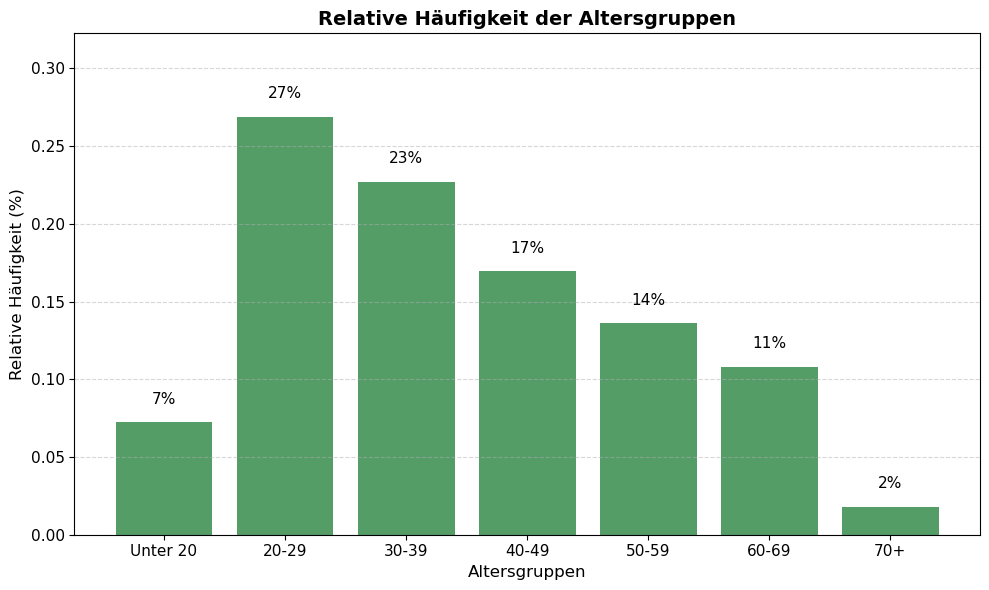

In [193]:

# Farbton & Labels
farbe = "#549D67"
labels = {
    "0-19": "Unter 20", "20-29": "20-29", "30-39": "30-39",
    "40-49": "40-49", "50-59": "50-59", "60-69": "60-69", "70+": "70+"
}

# Häufigkeiten berechnen & umbenennen
rel_freq = df_cleaned["S2_groups"].value_counts(normalize=True).sort_index()
rel_freq.index = rel_freq.index.map(labels)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(rel_freq.index, rel_freq.values, color=farbe)

# Prozentwerte auf Balken
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f"{height:.0%}", ha='center', va='bottom', fontsize=11)

# Layout
plt.title("Relative Häufigkeit der Altersgruppen", fontsize=14, fontweight='bold')
plt.xlabel("Altersgruppen", fontsize=12)
plt.ylabel("Relative Häufigkeit (%)", fontsize=12)
plt.ylim(0, rel_freq.max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


Die **häufigste Altersgruppe ist die der 20-29 Jährigen** (27%). Die wenigsten Teilnehmer:innen sind unter 20 oder über 70 Jahre alt.

In [194]:
#Bildung

# Absolute Häufigkeit
print("Absolute Häufigkeit (S4):")
print(df_cleaned["S4"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S4):")
print(df_cleaned["S4"].value_counts(normalize=True, dropna=False).round(3))

Absolute Häufigkeit (S4):
S4
2    365
3    231
4    193
1    157
6     31
5     18
0     10
7      3
Name: count, dtype: int64

Relative Häufigkeit (S4):
S4
2    0.362
3    0.229
4    0.191
1    0.156
6    0.031
5    0.018
0    0.010
7    0.003
Name: proportion, dtype: float64


In [195]:
# Bildung
# Mapping für Labels
abschluss_labels = {
    0: "Sonstiges",  # wird zusammengefasst
    1: "Haupt- oder Volksschul-Abschluss",
    2: "Mittlere Reife oder Abschluss der polytechnischen Oberschule",
    3: "Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)",
    4: "Fachhochschulabschluss, Hochschulabschluss",
    5: "Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss",
    6: "Noch in Schulausbildung mit Abschlussziel Hochschulreife",
    7: "Sonstiges"  # wird zusammengefasst
}

# S4 als int (falls nicht schon)
df_cleaned["S4_int"] = df_cleaned["S4"].astype('float').astype('Int64')

# Zusammenfassen von 0 und 7 zu "Sonstiges"
def map_sonstiges(x):
    if pd.isna(x):
        return np.nan
    if x in [0, 7]:
        return "Sonstiges"
    return abschluss_labels.get(x, "Unbekannt")

abschluss_series = df_cleaned["S4_int"].apply(map_sonstiges)

# Relative Häufigkeiten in Prozent berechnen
rel_freq = abschluss_series.value_counts(normalize=True, dropna=False) * 100

# DataFrame für die Tabelle, sortiert nach Häufigkeit (absteigend)
result_df = pd.DataFrame({
    '<span style="color:#549D67"><b>Abschluss</b></span>': rel_freq.index,
    '<span style="color:#549D67"><b>Relative Häufigkeit (%)</b></span>': rel_freq.round(1).values
}).sort_values(by='<span style="color:#549D67"><b>Relative Häufigkeit (%)</b></span>', ascending=False).reset_index(drop=True)

# Anzeige als HTML-Tabelle mit farbigen Spaltennamen
from IPython.display import display, HTML
display(HTML(result_df.to_html(escape=False, index=False)))


Abschluss,Relative Häufigkeit (%)
Mittlere Reife oder Abschluss der polytechnischen Oberschule,36.2
"Abitur, Fachhochschulreife (Gymnasium oder erweiterte Oberschule EOS)",22.9
"Fachhochschulabschluss, Hochschulabschluss",19.1
Haupt- oder Volksschul-Abschluss,15.6
Noch in Schulausbildung mit Abschlussziel Hochschulreife,3.1
Noch in Schulausbildung mit Abschlussziel Haupt-/Realschulabschluss,1.8
Sonstiges,1.3


Der höchste Bildungsabschluss ist unter den Teilnehmer:innen sehr eher heterogen: 36% haben die Mittlere Reife oder einen Abschluss der polytechnischen Oberschule, 23% haben das Abitur oder die Fachhochschulreife. Nur 5% sind noch in Schulausbildung.

In [196]:
# Erwerbstätigkeit 

# Relative Häufigkeit
print("\nRelative Häufigkeit (S5):")
print(df_cleaned["S5"].value_counts(normalize=True, dropna=False).round(3))


Relative Häufigkeit (S5):
S5
1.0     0.662
6.0     0.109
8.0     0.062
7.0     0.051
9.0     0.034
11.0    0.030
2.0     0.026
4.0     0.013
NaN     0.007
5.0     0.005
10.0    0.002
3.0     0.001
Name: proportion, dtype: float64


In [197]:
# Visualisierung Erwerbstätigkeit

from IPython.display import display, HTML

# Mapping der wichtigsten Erwerbsstatus-Ausprägungen
erwerb_labels = {
    1.0: "Voll-/Teilzeiterwerbstätig",
    6.0: "Rentner/in",
    8.0: "Student/in",
    7.0: "Schüler/in",
    9.0: "Hausfrau/-mann",
}

# Häufigkeiten berechnen
rel_freq = df_cleaned["S5"].value_counts(normalize=True, dropna=False) * 100

# Nur die 5 häufigsten Kategorien
top6 = rel_freq.nlargest(5)

# Labels anwenden
labels = top6.index.map(lambda x: erwerb_labels.get(x, f"Code {x}"))
values = top6.round(1).values

# Tabelle bauen
result_df = pd.DataFrame({
    '<span style="color:#549D67"><b>Erwerbstätigkeit</b></span>': labels,
    '<span style="color:#549D67"><b>Relative Häufigkeit (%)</b></span>': values
}).reset_index(drop=True)

# Ausgabe als HTML
display(HTML(result_df.to_html(escape=False, index=False)))


Erwerbstätigkeit,Relative Häufigkeit (%)
Voll-/Teilzeiterwerbstätig,66.2
Rentner/in,10.9
Student/in,6.2
Schüler/in,5.1
Hausfrau/-mann,3.4


Die eindeutige Mehrheit der Teilnehmer:innen ist voll- oder teilzeiterwerbstätig (66%). Positiv ist, dass die Stichprobe im Gegensatz zu quantitativen Datenerhebungen im bisherigen Studium **nicht studentisch** ausfällt (6%).

In [198]:
# Berufliche Stellung

# Absolute Häufigkeit
print("Absolute Häufigkeit (S6):")
print(df_cleaned["S6"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S6:")
print(df_cleaned["S6"].value_counts(normalize=True, dropna=False).round(3)) 

Absolute Häufigkeit (S6):
S6
2.0    501
NaN    345
1.0     83
3.0     39
5.0     32
7.0      5
6.0      3
Name: count, dtype: int64

Relative Häufigkeit (S6:
S6
2.0    0.497
NaN    0.342
1.0    0.082
3.0    0.039
5.0    0.032
7.0    0.005
6.0    0.003
Name: proportion, dtype: float64


In [199]:
# Ziel: Bundesländer in einer Deutschlandkarte abbilden

# Relative Häufigkeit in Prozent
print("\nRelative Häufigkeit (S7) in Prozent:")
print((df_cleaned["S7"].value_counts(normalize=True, dropna=False) * 100).round(2))



Relative Häufigkeit (S7) in Prozent:
S7
Nordrhein-Westfalen       24.60
Bayern                    13.00
Baden-Württemberg         11.90
Niedersachsen              9.13
Hessen                     7.84
Sachsen                    5.56
Rheinland-Pfalz            5.26
Schleswig-Holstein         4.27
Berlin                     3.77
Thüringen                  3.08
Brandenburg                2.78
Sachsen-Anhalt             2.58
Hamburg                    2.38
Mecklenburg-Vorpommern     1.69
Bremen                     1.39
Saarland                   0.79
Name: proportion, dtype: float64


In [200]:
# GeoJSON der deutschen Bundesländer von einer öffentlichen Quelle
url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
bundeslaender = gpd.read_file(url)

# Zeige die ersten Zeilen & Spaltennamen
print(bundeslaender.head())
print(bundeslaender.columns)

      id               name   type  \
0  DE-BW  Baden-Württemberg  State   
1  DE-BY             Bayern  State   
2  DE-BE             Berlin  State   
3  DE-BB        Brandenburg  State   
4  DE-HB             Bremen  State   

                                            geometry  
0  MULTIPOLYGON (((9.6505 49.776, 9.651 49.765, 9...  
1  POLYGON ((10.134 50.55, 10.14 50.543, 10.152 5...  
2  POLYGON ((13.162 52.594, 13.18 52.594, 13.192 ...  
3  POLYGON ((13.88 53.501, 13.879 53.499, 13.873 ...  
4  POLYGON ((8.9854 53.128, 8.9732 53.128, 8.9672...  
Index(['id', 'name', 'type', 'geometry'], dtype='object')


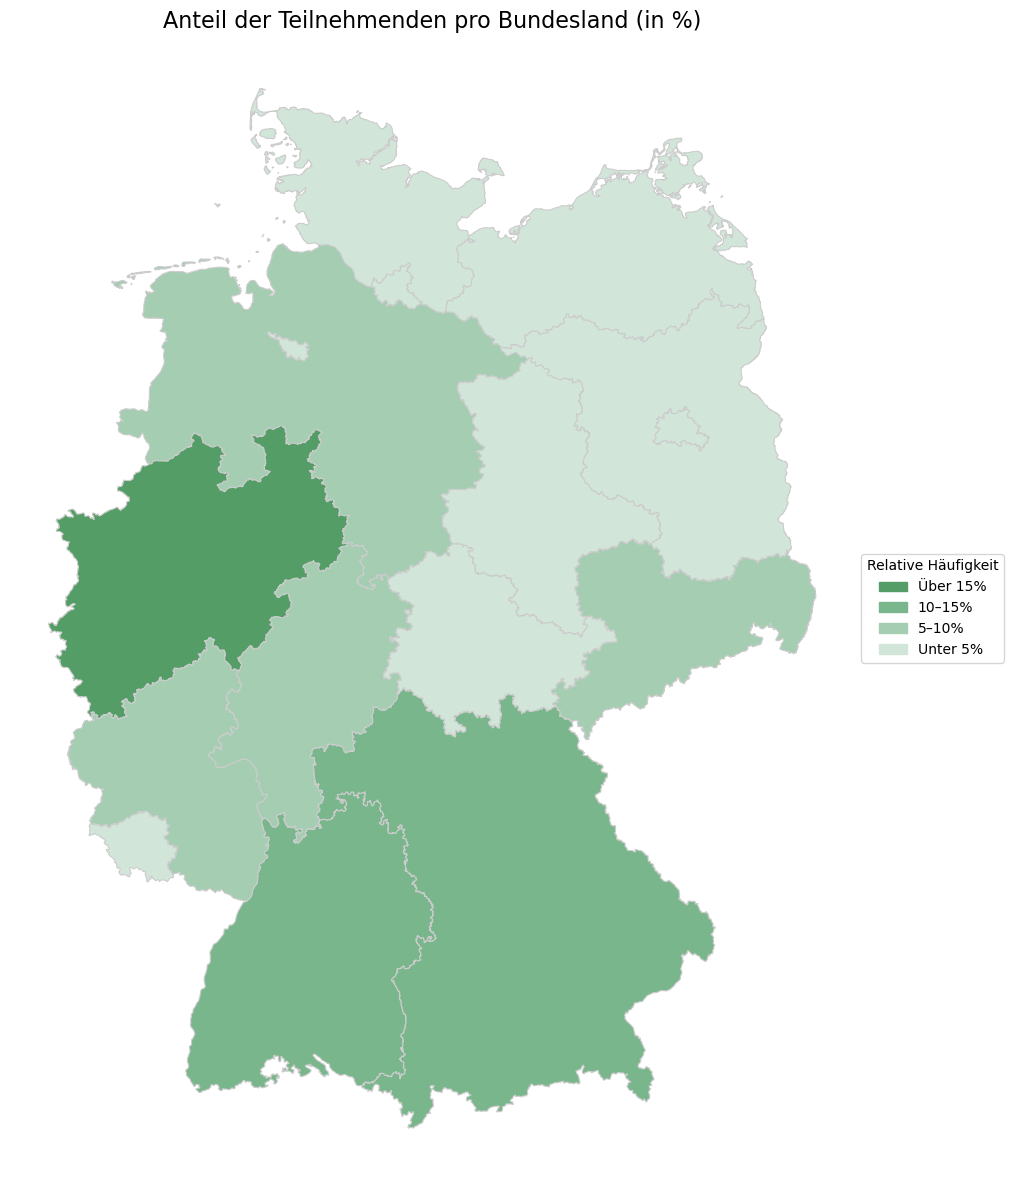

In [201]:
#  relativen Häufigkeiten pro Bundesland
df_laender_haeufigkeiten = {
    'Bundesland': [
        'Nordrhein-Westfalen', 'Bayern', 'Baden-Württemberg', 'Niedersachsen',
        'Hessen', 'Sachsen', 'Rheinland-Pfalz', 'Schleswig-Holstein', 'Berlin',
        'Thüringen', 'Brandenburg', 'Sachsen-Anhalt', 'Hamburg',
        'Mecklenburg-Vorpommern', 'Bremen', 'Saarland'
    ],
    'relative_Häufigkeit': [
        24.60, 13.00, 11.90, 9.13, 7.84, 5.56, 5.26, 4.27, 3.77,
        3.08, 2.78, 2.58, 2.38, 1.69, 1.39, 0.79
    ]
}

df_deutschlandkarte = pd.DataFrame(df_laender_haeufigkeiten)

# Farbcodierung auf Basis der Gruppen
def farbgruppe(häufigkeit):
    if häufigkeit > 15:
        return '#549D67'  # Gruppe 1
    elif 10 < häufigkeit <= 15:
        return '#7AB68C'  # Gruppe 2
    elif 5 <= häufigkeit <= 10:
        return '#A4CDB2'  # Gruppe 3
    else:
        return '#D1E6D9'  # Gruppe 4

df_deutschlandkarte['farbe'] = df_deutschlandkarte['relative_Häufigkeit'].apply(farbgruppe)

# Beispiel: GeoJSON der deutschen Bundesländer von einer öffentlichen Quelle
url = "https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/2_hoch.geo.json"
bundeslaender = gpd.read_file(url)

# Mergen mit Häufigkeiten
merged = bundeslaender.merge(df_deutschlandkarte, left_on='name', right_on='Bundesland')

# Plot erstellen
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
merged.plot(color=merged['farbe'], linewidth=0.8, edgecolor='0.8', ax=ax)

# Titel
ax.set_title("Anteil der Teilnehmenden pro Bundesland (in %)", fontsize=16)
ax.axis('off')

# Legende manuell erstellen
import matplotlib.patches as mpatches
legende = [
    mpatches.Patch(color='#549D67', label='Über 15%'),
    mpatches.Patch(color='#7AB68C', label='10–15%'),
    mpatches.Patch(color='#A4CDB2', label='5–10%'),
    mpatches.Patch(color='#D1E6D9', label='Unter 5%')
]
ax.legend(handles=legende, title='Relative Häufigkeit', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()



Anhand der Deutschlandkarte wird sichtbar, dass der Anteil der Teilnehmer:innen aus Ostdeutschland deutlich geringer ist als der Anteil der Teilnehmer:innen aus Westdeutschland. Die – relativ gesehen – meisten Befragten kommen aus NRW, Bayern und Baden-Württemberg.

In [202]:
# Gemeindegröße

# Absolute Häufigkeit
print("Absolute Häufigkeit (S8):")
print(df_renamed["S8"].value_counts(dropna=False))

# Relative Häufigkeit
print("\nRelative Häufigkeit (S8:")
print(df_renamed["S8"].value_counts(normalize=True, dropna=False).round(3)) 



Absolute Häufigkeit (S8):
S8
5.000 bis unter 20.000 Einwohner       201
500.000 oder mehr Einwohner            189
100.000 bis unter 500.000 Einwohner    174
Weniger als 5.000 Einwohner            159
20.000 bis unter 50.000 Einwohner      151
50.000 bis unter 100.000 Einwohner     103
Weiß nicht                              31
Name: count, dtype: int64

Relative Häufigkeit (S8:
S8
5.000 bis unter 20.000 Einwohner       0.199
500.000 oder mehr Einwohner            0.188
100.000 bis unter 500.000 Einwohner    0.173
Weniger als 5.000 Einwohner            0.158
20.000 bis unter 50.000 Einwohner      0.150
50.000 bis unter 100.000 Einwohner     0.102
Weiß nicht                             0.031
Name: proportion, dtype: float64


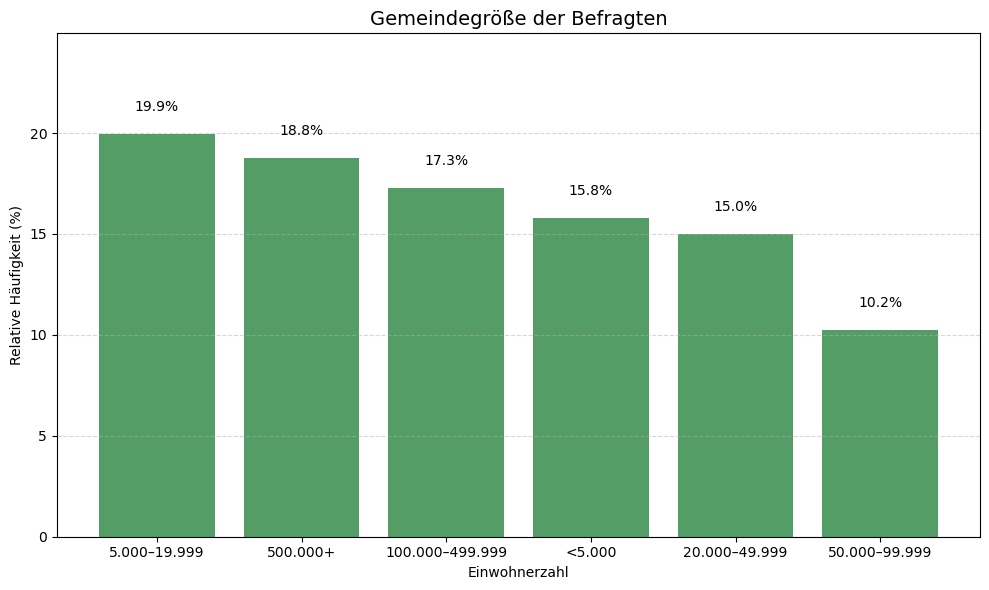

In [203]:
# Gemeindegröße in einem Balkendiagramm visualisieren

# Mapping mit präziser Sortierung
label_map = {
    "Weniger als 5.000 Einwohner": "<5.000",
    "5.000 bis unter 20.000 Einwohner": "5.000–19.999",
    "20.000 bis unter 50.000 Einwohner": "20.000–49.999",
    "50.000 bis unter 100.000 Einwohner": "50.000–99.999",
    "100.000 bis unter 500.000 Einwohner": "100.000–499.999",
    "500.000 oder mehr Einwohner": "500.000+"
}

# Häufigkeiten berechnen (ohne "weiß nicht")
rel_freq = df_cleaned["S8"].value_counts(normalize=True)
rel_freq = rel_freq[rel_freq.index.isin(label_map.keys())]

# Achsenlabels mappen
x_labels = [label_map[k] for k in rel_freq.index]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x_labels, rel_freq.values * 100, color="#549D67")

# Prozentwerte auf Balken
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y + 1, f"{y:.1f}%", ha='center', va='bottom')

# Layout
plt.title("Gemeindegröße der Befragten", fontsize=14)
plt.ylabel("Relative Häufigkeit (%)")
plt.xlabel("Einwohnerzahl")
plt.ylim(0, max(rel_freq.values * 100) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Die Teilnehmer:innen verteilen sich recht gleichmäßig auf die gruppierten Gemeindegrößen. Die häufigste Angabe – wenn auch mit geringem Abstand – ist eine **Gemeindegröße von 5 bis 20 Tausend Einwohnern** (20%).

In [204]:
# Haushaltseinkommen 

# Relative Häufigkeit
print("\nRelative Häufigkeit (S9:")
print(df_cleaned["S9"].value_counts(normalize=True, dropna=False).round(3)) 


Relative Häufigkeit (S9:
S9
Keine Angabe                  0.198
750 bis unter 1.500 EURO      0.136
3.000 bis unter 4.000 EURO    0.130
2.500 bis unter 3.000 EURO    0.121
2.000 bis unter 2.500 EURO    0.110
1.500 bis unter 2.000 EURO    0.110
4.000 bis unter 5.000 EURO    0.093
5.000 EURO und mehr           0.065
450 bis unter 750 EURO        0.022
Bis unter 450 EURO            0.014
Name: proportion, dtype: float64


Die **häufigste Angabe ist "keine Angabe"** (20%). 14% geben an, ein Haushaltseinkommen von 750 bis 1500€ zu haben.

### Deskriptive Häufigkeiten: Nutzungshäufigkeit sozialer Medien


In [205]:
# Plattformen - Relative Häufigkeiten
plattformen = [
    "Facebook", "Instagram", "Twitter", "YouTube", "Google+", "LinkedIn", "Xing",
    "Tumblr", "Reddit", "Snapchat", "WhatsApp"
]

# Ergebnisse sammeln
ergebnisse = []

# Für jede Plattform: relative Häufigkeit der "1" (ausgewählt)
for i, plattform in enumerate(plattformen, 1):
    var = f"SC2_{i}"
    if var in df_cleaned.columns:
        rel_freq = df_cleaned[var].value_counts(normalize=True, dropna=True) * 100
        freq_1 = round(rel_freq.get(1, 0), 1)  # Nur Wert für Antwort "1"
        ergebnisse.append((plattform, freq_1))

# DataFrame erstellen
result = pd.DataFrame(ergebnisse, columns=["Plattform", "Relative Häufigkeiten (%)"])

# Absteigend sortieren
result = result.sort_values(by="Relative Häufigkeiten (%)", ascending=False).reset_index(drop=True)

# Spaltenüberschriften einfärben
result.columns = [f'<span style="color:#549D67"><b>{col}</b></span>' for col in result.columns]

# Anzeige als HTML-Tabelle
from IPython.display import display, HTML
display(HTML(result.to_html(escape=False, index=False)))

  

Plattform,Relative Häufigkeiten (%)
YouTube,45.9
Instagram,42.0
Google+,16.0
Facebook,15.4
Twitter,15.2
WhatsApp,14.4
Snapchat,12.1
Xing,7.7
LinkedIn,4.8
Tumblr,2.8


Die häufigsten Angaben sind mit Abstand **WhatsApp** (86%) und **Facebook** (85%). YouTube (46%) und Instagram (42%) werden nur von etwas weniger als der Hälfte der Teilnehmer:innen genutzt. Hierbei ist allerdings zu beachten: Mittlerweile sind 7 Jahre seit der Erhebung der Daten vergangen, weshalb die Anteile heutzutage vermutlich anders ausfallen würden.

In [206]:
# spannende These, inwiefern Alter & Nutzungshäufigkeit zusammenhängen 

# Korrelation mit vollständigen Fällen berechnen
rho, pval = spearmanr(df_cleaned['S2'], df_cleaned['SC1'], nan_policy='omit')

print(f"Spearman-Korrelation: rho = {rho:.3f}, p = {pval:.4f}")
if pval < 0.05:
    print("Statistisch signifikanter Zusammenhang: Jüngere nutzen soziale Medien intensiver.")
else:
    print("Kein signifikanter Zusammenhang.")


Spearman-Korrelation: rho = 0.297, p = 0.0000
Statistisch signifikanter Zusammenhang: Jüngere nutzen soziale Medien intensiver.


In [207]:
#falls uns die genauen Werte interessieren - je Altersgruppe
# Mittelwert der Nutzungshäufigkeit je Altersgruppe
nutzung_mittel = df_cleaned.groupby('S2_groups')['SC1'].mean().sort_index()

print("Durchschnittliche Nutzungshäufigkeit pro Altersgruppe:")
print(nutzung_mittel)


Durchschnittliche Nutzungshäufigkeit pro Altersgruppe:
S2_groups
0-19     1.657534
20-29    1.900369
30-39    2.056769
40-49    2.099415
50-59    2.189781
60-69    2.220183
70+      2.388889
Name: SC1, dtype: float64


In [208]:
# A2 (Warum werden soziale Medien genutzt?)

# Relative Häufigkeit in Prozent
print("\nRelative Häufigkeit (Informieren über das aktuelle Tagesgeschehen):")
print((df_cleaned["A2_3"].value_counts(normalize=True, dropna=False) * 100).round(1))

print("\nRelative Häufigkeit (Über politische Themen diskutieren):")
print((df_cleaned["A2_5"].value_counts(normalize=True, dropna=False) * 100).round(1))



Relative Häufigkeit (Informieren über das aktuelle Tagesgeschehen):
A2_3
2.0    44.2
1.0    26.8
3.0    19.9
4.0     8.6
NaN     0.4
Name: proportion, dtype: float64

Relative Häufigkeit (Über politische Themen diskutieren):
A2_5
4.0    44.2
3.0    33.8
2.0    16.3
1.0     4.5
NaN     1.2
Name: proportion, dtype: float64


Der Großteil nutzt soziale Medien, um sich über das aktuelle Tagesgeschehen zu informieren (71% stimmen eher oder voll und ganz zu).
Dagegen stimen nur 21% eher oder voll und ganz zu, soziale Medien zu nutzen, um über politische Themen zu diskutieren.

Die Teilnehmer:innen scheinen also deskriptiv eher **passive** Berührungspunkte mit politischen Themen in sozialen Medien zu haben, statt sich selbst **aktiv** zu beteiligen.

In [209]:
#Mittelwerte für ganz A2

# Alle A2-Variablen auswählen (z. B. A2_1 bis A2_11)
a2_columns = [col for col in df_cleaned.columns if col.startswith('A2_')]

# Mittelwerte berechnen und sortieren (niedriger Wert = höhere Zustimmung)
a2_means = df_cleaned[a2_columns].mean().sort_values()

# Ergebnisse anzeigen
print("Durchschnittliche Zustimmung zu Social-Media-Nutzungsmotiven (Frage A2):")
print(a2_means.round(2))


Durchschnittliche Zustimmung zu Social-Media-Nutzungsmotiven (Frage A2):
A2_1     1.52
A2_2     1.91
A2_11    1.97
A2_3     2.10
A2_7     2.20
A2_9     2.67
A2_4     2.67
A2_10    2.67
A2_6     2.78
A2_8     2.84
A2_5     3.19
dtype: float64


Die Befragten scheinen eher soziale Medien eher aus Unterhaltungsgründen zu nutzen, als sich über politische Informationen zu informieren oder zu diskutieren: Austausch mit Familie/Freunden (M = 1.52; A2_1), Unterhaltung/Zeitvertreib (M = 1.97; A2_11), Informieren über das aktuelle Tagesgeschehen (M = 2.10; A2_3), Diskussion über politische Themen (M = 3.19; A2_5).


In [210]:
#Rolle sozialer Medien

# Liste der A3-Variablen
a3_items = ['A3_1', 'A3_2', 'A3_3', 'A3_4', 'A3_5']

# Mittelwerte berechnen und sortiert ausgeben
a3_means = df_cleaned[a3_items].mean().round(2).sort_values()

# Ausgabe
print("Mittelwerte der A3-Items (1 = Zustimmung, 6 = Ablehnung):")
print(a3_means)


Mittelwerte der A3-Items (1 = Zustimmung, 6 = Ablehnung):
A3_1    3.00
A3_5    3.31
A3_3    3.38
A3_4    3.41
A3_2    3.75
dtype: float64


Die Rolle sozialer Medien wird eher distanziert bzw. kritisch bewertet (auf einer Skala von 1 bis 6).
Dabei wird Glaubwürdigkeit am kritischsten bewertet (*M* = 3.75).

In [211]:
#Politisches Interesse

mean_b4 = df_cleaned["B4"].mean()
std_b4 = df_cleaned["B4"].std()
print(f"Mittelwert (B4): {mean_b4:.2f}")
print(f"Standardabweichung (B4): {std_b4:.2f}")

Mittelwert (B4): 3.19
Standardabweichung (B4): 1.47


Im Mittel interessieren sich die Teilnehmer:innen weder "sehr" noch "überhaupt nicht", sondern mittelmäßig (*M* = 3.19).

### Politisches Informationsverhalten


In [212]:
#Touchpoints Politik: Mittelwert berechnen

mean_touchpoint = df_cleaned["B5_3"].mean()
std_touchpoint = df_cleaned["B5_3"].std()
print(f"Mittelwert (B5_3): {mean_touchpoint:.2f}")
print(f"Standardabweichung (B5_5): {std_touchpoint:.2f}")

Mittelwert (B5_3): 2.22
Standardabweichung (B5_5): 0.81


In [213]:
# Touchpoints Politik: Mittelwerte für B5_1 bis B5_6 berechnen und ausgeben

b5_vars = [f"B5_{i}" for i in range(1, 7)]
b5_means = df_cleaned[b5_vars].mean().round(2)

print("Mittelwerte für B5_1 bis B5_6:")
print(b5_means)

Mittelwerte für B5_1 bis B5_6:
B5_1    2.46
B5_2    2.08
B5_3    2.22
B5_4    2.92
B5_5    2.83
B5_6    1.57
dtype: float64


In [214]:
# Mediennutzung, um sich aktiv über Politik zu informieren

# Mittelwerte für B6_1 bis B6_9 berechnen und sortiert (aufsteigend) ausgeben

b6_vars = [f"B6_{i}" for i in range(1, 10)]
b6_means = df_cleaned[b6_vars].mean().sort_values()

print("Mittelwerte für B6_1 bis B6_9 (aufsteigend sortiert):")
print(b6_means.round(2))


Mittelwerte für B6_1 bis B6_9 (aufsteigend sortiert):
B6_1    1.99
B6_7    2.32
B6_3    2.38
B6_4    2.47
B6_2    2.79
B6_5    2.82
B6_6    2.88
B6_9    3.22
B6_8    3.54
dtype: float64


In [215]:
# Einstellung zu politischen Beiträgen in SN

# Mittelwerte für alle C14-Variablen berechnen und aufsteigend sortieren

# Alle C14-Variablen auswählen
c14_vars = [col for col in df_cleaned.columns if col.startswith("C14_")]

# Mittelwerte berechnen und sortieren
c14_means = df_cleaned[c14_vars].mean().sort_values()

print("Mittelwerte der C14-Variablen (aufsteigend sortiert):")
print(c14_means.round(2))

Mittelwerte der C14-Variablen (aufsteigend sortiert):
C14_3    2.72
C14_6    3.53
C14_2    3.69
C14_5    3.74
C14_4    4.39
C14_1    4.68
dtype: float64


<bound method Axes.set of <Axes: >>

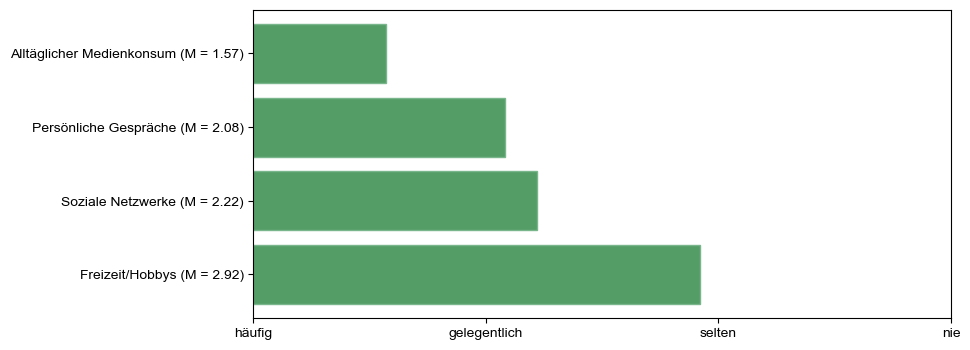

In [216]:
# Darstellung für Touchpoints Politik 

mpl.rcParams['font.family'] = 'Arial'

# Daten
categories = [
    "Alltäglicher Medienkonsum (M = 1.57)",
    "Persönliche Gespräche (M = 2.08)",
    "Soziale Netzwerke (M = 2.22)",
    "Freizeit/Hobbys (M = 2.92)"
]
values = [1.57, 2.08, 2.22, 2.92]

# Farben (LMU-Grün)
main_color = "#549D67"  # Füllung
edge_color = "#7AB68C"  # Rand

# X-Achse Beschriftung
x_labels = ["häufig", "gelegentlich", "selten", "nie"]
x_positions = [1, 2, 3, 4]

# Plot erstellen
fig, ax = plt.subplots(figsize=(9, 4))

bars = ax.barh(categories, values, color=main_color, edgecolor=edge_color)

# X-Achse konfigurieren
ax.set_xlim(1, 4)
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
ax.invert_yaxis()  # Höchste Nutzung oben

# Achsentitel und Gridlines
ax.set


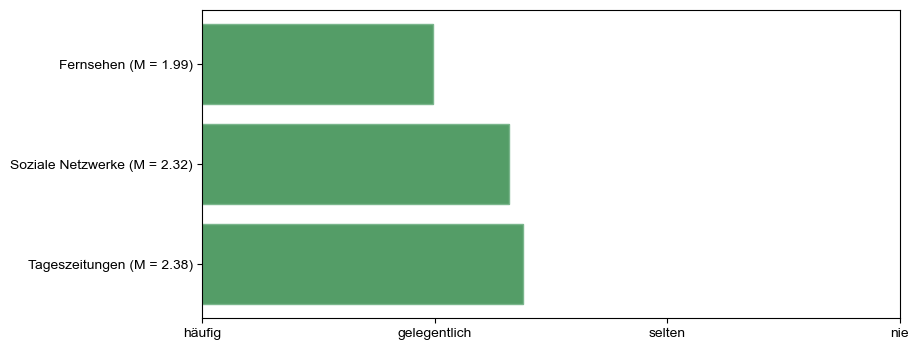

In [217]:
# Darstellung für Mediennutzung Politik 

mpl.rcParams['font.family'] = 'Arial'

# Daten
categories = [
    "Fernsehen (M = 1.99)",
    "Soziale Netzwerke (M = 2.32)",
    "Tageszeitungen (M = 2.38)"
]
values = [1.99, 2.32, 2.38]

# Farben (LMU-Grün)
main_color = "#549D67"  # Füllung
edge_color = "#7AB68C"  # Rand

# X-Achse Beschriftung
x_labels = ["häufig", "gelegentlich", "selten", "nie"]
x_positions = [1, 2, 3, 4]

# Plot erstellen
fig, ax = plt.subplots(figsize=(9, 4))

bars = ax.barh(categories, values, color=main_color, edgecolor=edge_color)

# X-Achse konfigurieren
ax.set_xlim(1, 4)
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)
ax.invert_yaxis()  # Höchste Nutzung oben



### Lebensumstände

In [218]:
# Mittelwert für Parteiidentifikation (E29) berechnen und ausgeben

mean_e29 = df_cleaned["E29"].mean()
std_e29 = df_cleaned["E29"].std()

print(f"Mittelwert (E29): {mean_e29:.2f}")
print(f"Standardabweichung (E29): {std_e29:.2f}")

Mittelwert (E29): 2.52
Standardabweichung (E29): 0.88


In [226]:
# Mittelwerte der Parteiidentifikation (E29) nach Ost-West-Variable berechnen und ausgeben

mean_e29_ost_west = df_cleaned.groupby("ost_west")["E29"].mean().round(2)
print("Mittelwerte der Parteiidentifikation (E29) nach ost_west:")
print(mean_e29_ost_west)

Mittelwerte der Parteiidentifikation (E29) nach ost_west:
ost_west
0.0    2.48
1.0    2.64
Name: E29, dtype: float64


In [227]:
# Mittelwert und Standardabweichung für Demokratiezufriedenheit (E27) berechnen und ausgeben

mean_e27 = df_cleaned["E27"].mean()
std_e27 = df_cleaned["E27"].std()

print(f"Mittelwert (E27): {mean_e27:.2f}")
print(f"Standardabweichung (E27): {std_e27:.2f}")

Mittelwert (E27): 2.55
Standardabweichung (E27): 0.79


In [228]:
# Mittelwerte der Demokratiezufriedenheit (E27) nach Ost-West-Variable berechnen und ausgeben

mean_e27_ost_west = df_cleaned.groupby("ost_west")["E27"].mean().round(2)
print("Mittelwerte der Demokratiezufriedenheit (E27) nach ost_west:")
print(mean_e27_ost_west)

Mittelwerte der Demokratiezufriedenheit (E27) nach ost_west:
ost_west
0.0    2.51
1.0    2.70
Name: E27, dtype: float64


In [229]:
# Mittelwert und Standardabweichung für Demokratie als gute Regierungsform (E28) berechnen und ausgeben

mean_e28 = df_cleaned["E28"].mean()
std_e28 = df_cleaned["E28"].std()

print(f"Mittelwert (E28): {mean_e28:.2f}")
print(f"Standardabweichung (E28): {std_e28:.2f}")

Mittelwert (E28): 1.13
Standardabweichung (E28): 0.34


In [230]:
# Mittelwerte der Variable E28 (Demokratie als gute Regierungsform) nach Ost-West-Variable berechnen und ausgeben

mean_e28_ost_west = df_cleaned.groupby("ost_west")["E28"].mean().round(2)
print("Mittelwerte von E28 (Demokratie als gute Regierungsform) nach ost_west:")
print(mean_e28_ost_west)

Mittelwerte von E28 (Demokratie als gute Regierungsform) nach ost_west:
ost_west
0.0    1.12
1.0    1.16
Name: E28, dtype: float64


In [231]:
# Neue Ost-West-Variable auf Basis der Bundesländer (S7) erstellen

west_bundeslaender = [
    "Baden-Württemberg", "Bayern", "Bremen", "Hamburg", "Hessen",
    "Niedersachsen", "Nordrhein-Westfalen", "Rheinland-Pfalz",
    "Saarland", "Schleswig-Holstein"
]
ost_bundeslaender = [
    "Brandenburg", "Mecklenburg-Vorpommern", "Sachsen",
    "Sachsen-Anhalt", "Thüringen"
]

def map_ost_west(bl):
    if pd.isna(bl):
        return np.nan
    if bl in west_bundeslaender:
        return 0
    if bl in ost_bundeslaender:
        return 1
    return np.nan

df_cleaned["ost_west"] = df_cleaned["S7"].apply(map_ost_west)

In [232]:
# Relative Häufigkeiten der Ost-West-Variable in Prozent ausgeben

rel_ost_west = df_cleaned["ost_west"].value_counts(normalize=True, dropna=False) * 100
print("Relative Häufigkeiten der Variable ost_west (in %):")
print(rel_ost_west.round(2))

Relative Häufigkeiten der Variable ost_west (in %):
ost_west
0.0    80.56
1.0    15.67
NaN     3.77
Name: proportion, dtype: float64


In [233]:
#Mediennutzung für Politik

mean_politmediennutzung = df_cleaned["B6_7"].mean()
std_politmediennutzung = df_cleaned["B6_7"].std()
print(f"Mittelwert (B6_7): {mean_politmediennutzung:.2f}")
print(f"Standardabweichung (B6_7): {std_politmediennutzung:.2f}")

Mittelwert (B6_7): 2.32
Standardabweichung (B6_7): 0.99


In [234]:
# Übersichtliche Tabelle: Mittelwerte der Demokratiezufriedenheit (E27) nach Bundesland

import pandas as pd
from IPython.display import display

# Mittelwerte berechnen
mittelwerte = df_cleaned.groupby('S7')['E27'].mean().reset_index()
mittelwerte.columns = ['Bundesland', 'Mittelwert Demokratiezufriedenheit (E27)']

# Nach Mittelwert sortieren (höchste Zufriedenheit oben)
mittelwerte = mittelwerte.sort_values(by='Mittelwert Demokratiezufriedenheit (E27)', ascending=False)

# Runde die Mittelwerte auf 2 Nachkommastellen
mittelwerte['Mittelwert Demokratiezufriedenheit (E27)'] = mittelwerte['Mittelwert Demokratiezufriedenheit (E27)'].round(2)

# Tabelle anzeigen
display(mittelwerte)

,Bundesland,Mittelwert Demokratiezufriedenheit (E27)
15,Thüringen,2.86
12,Sachsen,2.71
13,Sachsen-Anhalt,2.69
7,Mecklenburg-Vorpommern,2.65
2,Berlin,2.61
1,Bayern,2.59
3,Brandenburg,2.57
9,Nordrhein-Westfalen,2.57
6,Hessen,2.53
14,Schleswig-Holstein,2.50


Die Mittelwertunterschiede zwischen den Bundesländern sind eher geringfügig. Daher haben wir uns dagegen entschieden,
die Demokratiezufriedenheit in einer Deutschlandkarte abzubilden und belassen es bei dieser Tabelle.

# BLOCK A: EINFLÜSSE AUF POLITISCHES INTERESSE

## Hypothese 1
Höheres politisches Interesse korreliert mit einer stärkeren Reaktion auf politische Beiträge und mit einer höheren Wahrscheinlichkeit, selbst politische Beiträge zu posten. (B4 → C8 & C9)

##### H1: Nutzungsweise sozialer Medien Block (1/2)

Reliabilitätsprüfung für Index "politisches Engagement" in politische Inhalte (C8 & C9):
Wir prüfen die interne Konsistenz (Reliabilität) der beiden Variablen C8 und C9 mittels Cronbachs Alpha, um zu beurteilen, ob sie zu einem sinnvollen Index für politisches Engagement zusammengefasst werden können.

In [235]:
# Auswahl der Variablen
reliability_H1 = df_cleaned[["C8", "C9"]].dropna()

# Cronbachs Alpha Funktion für 2 Items
def cronbach_alpha_2items(x, y):
    r, _ = pearsonr(x, y)
    return (2 * r) / (1 + r)

alpha = cronbach_alpha_2items(reliability_H1["C8"], reliability_H1["C9"])
print(f"Cronbachs Alpha für C8 und C9: {alpha:.3f}")

# Interpretation
if alpha >= 0.7:
    print("Die Reliabilität ist akzeptabel bis gut. Die Indexbildung ist sinnvoll.")
elif alpha >= 0.6:
    print("Die Reliabilität ist grenzwertig, aber noch akzeptabel.")
else:
    print("Die Reliabilität ist niedrig. Die Indexbildung sollte kritisch geprüft werden.")

Cronbachs Alpha für C8 und C9: 0.797
Die Reliabilität ist akzeptabel bis gut. Die Indexbildung ist sinnvoll.


In [236]:
# Mittelwerte ausgeben lassen für C8 und C9 

mean_c8 = df_cleaned["C8"].mean()
mean_c9 = df_cleaned["C9"].mean()

print(f"Mittelwert für C8: {mean_c8:.2f}")
print(f"Mittelwert für C9: {mean_c9:.2f}")

Mittelwert für C8: 3.11
Mittelwert für C9: 3.46


In [237]:
# Index bilden für politisches Engagement

df_cleaned["polit_engagement_index"] = df_cleaned[["C8", "C9"]].mean(axis=1, skipna=True)

In [238]:
# politisches Interesse & politisches Engagement 

# Nur vollständige Fälle (ohne NaN) verwenden
H1_engage = df_cleaned[["B4", "polit_engagement_index"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H1_engage["B4"], H1_engage["polit_engagement_index"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant (p < 0.001).")
else:
    print("Der Zusammenhang ist nicht signifikant (p ≥ 0.001).")

Korrelationskoeffizient (r): 0.293
Signifikanzniveau (p-Wert): 0.0000
Der Zusammenhang ist statistisch signifikant (p < 0.001).


Politisches Engagement auf sozialen Medien und politisches Interesse korrelieren signifikant schwach und positiv miteinander (*r* = .293, *p*<.001). Hohes politisches Engagement bedeutet also auch hohes politisches Interesse.

In [239]:
# Höheres politisches Interesse korreliert mit höherer Nutzung von Social Media zur politischen Information (A2_3)

# Nur vollständige Fälle (ohne NaN) verwenden
H1_info = df_cleaned[["B4", "A2_3"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H1_info["B4"], H1_info["A2_3"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant (p < 0.001).")
else:
    print("Der Zusammenhang ist nicht signifikant (p ≥ 0.001).")



Korrelationskoeffizient (r): 0.136
Signifikanzniveau (p-Wert): 0.0000
Der Zusammenhang ist statistisch signifikant (p < 0.001).


Die Nutzung von sozialen Medien zur politischen Information und politisches Interesse korrelieren signifikant schwach und positiv miteinander (*r* = .136, *p*<.001). Eine starke Nutzung sozialer Medien zur politischen Information geht mit einem hohen politischen Interesse einher.

In [240]:
# Höheres politisches Interesse korreliert mit höherer Nutzung von Social Media zur politischen Diskussion (A2_5)

# Nur vollständige Fälle (ohne NaN) verwenden
H1_disku = df_cleaned[["B4", "A2_5"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H1_disku["B4"], H1_disku["A2_5"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant (p < 0.001).")
else:
    print("Der Zusammenhang ist nicht signifikant (p ≥ 0.001).")

Korrelationskoeffizient (r): 0.347
Signifikanzniveau (p-Wert): 0.0000
Der Zusammenhang ist statistisch signifikant (p < 0.001).


Die Nutzung von sozialen Medien zur politischen Diskussion und politisches Interesse korrelieren signifikant mittelstark und positiv miteinander (*r* = .347, *p*<.001). Eine starke Nutzung sozialer Medien zur politischen Diskussion geht mit einem hohen politischen Interesse einher.

In [241]:
# Höheres politisches Interesse korreliert mit höherer Nutzung klassischer Medien (B6)
# Index für klassische Medien bilden: B6_1,2,3,5

# Mittelwertindex für klassische Mediennutzung (B6_1, B6_2, B6_3, B6_5)
df_cleaned["klassische_Medien_Index"] = df_cleaned[["B6_1", "B6_2", "B6_3", "B6_5"]].mean(axis=1, skipna=True)

# Kontrolle: Verteilung und erste Werte
print(df_cleaned["klassische_Medien_Index"].describe())
df_cleaned[["B6_1", "B6_2", "B6_3", "B6_5", "klassische_Medien_Index"]].head()

count    1008.000000
mean        2.495288
std         0.729476
min         1.000000
25%         2.000000
50%         2.500000
75%         3.000000
max         4.000000
Name: klassische_Medien_Index, dtype: float64


,B6_1,B6_2,B6_3,B6_5,klassische_Medien_Index
0,4,4.0,4.0,4.0,4.00
1,1,3.0,3.0,2.0,2.25
2,3,4.0,2.0,3.0,3.00
3,1,2.0,2.0,2.0,1.75
4,1,4.0,4.0,2.0,2.75


Korrelationskoeffizient (r): 0.413
Signifikanzniveau (p-Wert): 0.0000
Der Zusammenhang ist statistisch signifikant.


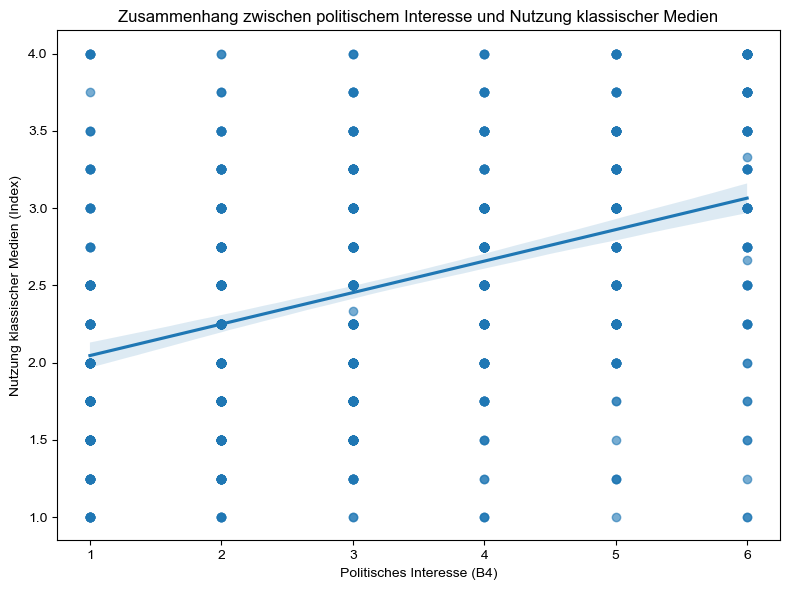

In [242]:
# Korrelation: politisches Interesse & klassische Medien

# Nur vollständige Fälle (ohne NaN) verwenden
H1_klass = df_cleaned[["B4", "klassische_Medien_Index"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H1_klass["B4"], H1_klass["klassische_Medien_Index"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant.")
else:
    print("Der Zusammenhang ist nicht signifikant.")

# Visualisierung der Korrelation
plt.figure(figsize=(8, 6))
sns.regplot(
    x="B4",
    y="klassische_Medien_Index",
    data=H1_klass,
    ci=95,
    scatter_kws={"alpha": 0.6}
)
plt.title("Zusammenhang zwischen politischem Interesse und Nutzung klassischer Medien")
plt.xlabel("Politisches Interesse (B4)")
plt.ylabel("Nutzung klassischer Medien (Index)")
plt.tight_layout()
plt.show()

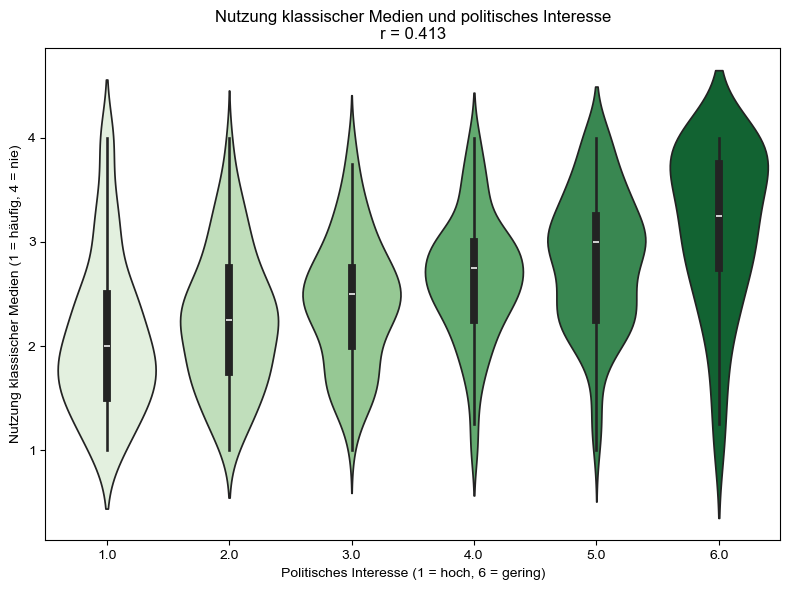

In [243]:
# B4 numerisch für Korrelation
H1_klass["B4"] = pd.to_numeric(H1_klass["B4"], errors="coerce")

# Pearson-Korrelation berechnen
r, _ = pearsonr(H1_klass["B4"], H1_klass["klassische_Medien_Index"])

# Plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x="B4",
    y="klassische_Medien_Index",
    data=H1_klass,
    palette="Greens"
)

plt.title(f"Nutzung klassischer Medien und politisches Interesse\nr = {r:.3f}")
plt.xlabel("Politisches Interesse (1 = hoch, 6 = gering)")
plt.ylabel("Nutzung klassischer Medien (1 = häufig, 4 = nie)")
plt.tight_layout()
plt.show()



Die Nutzungshäufigkeit klassischer Medien und politisches Interesse korrelieren signifikant mittelstark und positiv miteinander (*r* = .413, *p*<.001). Eine häufigere Nutzung klassischer Medien geht mit einem höheren politischen Interesse einher.

##### H1: Soziodemografie Block (2/2)

In [251]:
# Mittelwerte für B4 (politisches Interesse) nach Altersgruppen (S2_groups) berechnen und sortiert ausgeben

b4_mittel_alter = df_cleaned.groupby('S2_groups')['B4'].mean().sort_index()

print("Mittelwerte für politisches Interesse (B4) nach Altersgruppen:")
print(b4_mittel_alter)

Mittelwerte für politisches Interesse (B4) nach Altersgruppen:
S2_groups
0-19     3.561644
20-29    3.513109
30-39    3.197309
40-49    3.082353
50-59    2.875912
60-69    2.715596
70+      3.000000
Name: B4, dtype: float64


In [252]:
# Regression: Alter (S2) als Prädiktor für politisches Interesse (B4)

# Nur vollständige Fälle (ohne NaN) verwenden
reg_data = df_cleaned[["S2", "B4"]].dropna()

X = reg_data["S2"]
y = reg_data["B4"]

# Konstante für Intercept hinzufügen
X = sm.add_constant(X)

# Regression berechnen
model = sm.OLS(y, X).fit()

# Ergebnisse ausgeben
b = model.params["S2"]
p_wert = model.pvalues["S2"]
r_quadrat = model.rsquared

print(f"Regressionskoeffizient (b) für S2: {b:.3f}")
print(f"p-Wert: {p_wert:.4f}")
print(f"R²: {r_quadrat:.3f}")

Regressionskoeffizient (b) für S2: -0.018
p-Wert: 0.0000
R²: 0.032


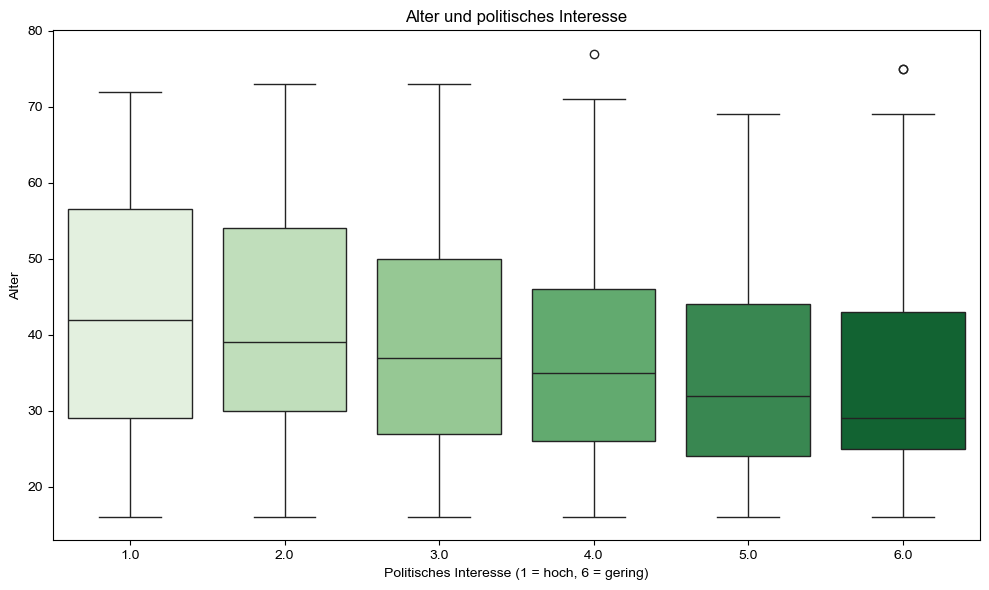

In [253]:
# Visualisierung: Politisches Interesse & Alter

# Nur vollständige Fälle (ohne NaN) verwenden
daten = df_cleaned[["B4", "S2"]].dropna()

plt.figure(figsize=(10, 6))
sns.boxplot(x="B4", y="S2", data=daten, palette="Greens")
plt.xlabel("Politisches Interesse (1 = hoch, 6 = gering)")
plt.ylabel("Alter")
plt.title("Alter und politisches Interesse")
plt.tight_layout()
plt.show()

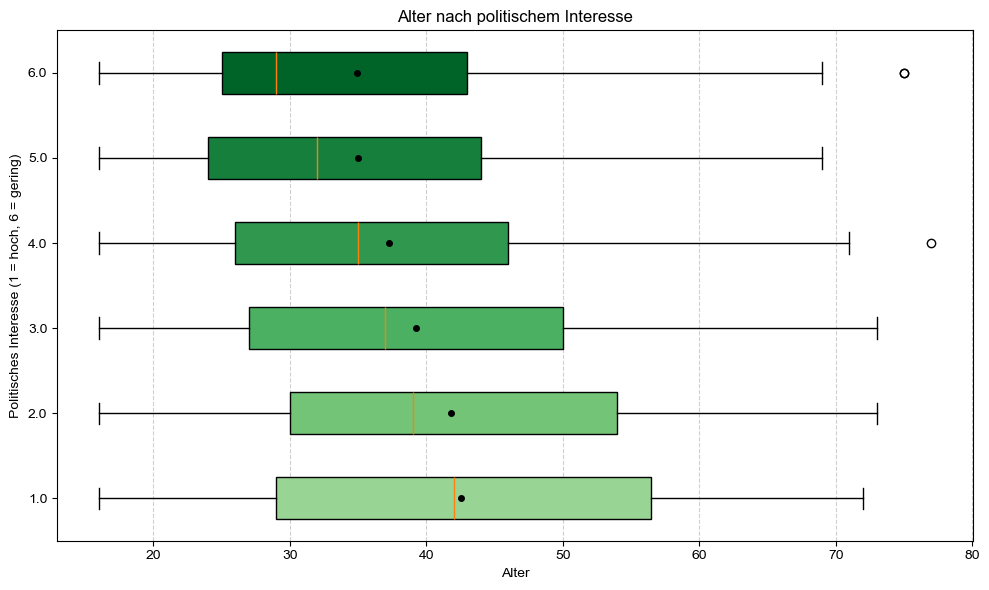

In [254]:
#Alternative Visualisierung von Alter & politischem Interesse (Achsen umgedreht)

# Gruppierung nach B4
gruppen = daten.groupby("B4")["S2"].apply(list)
kategorien = gruppen.index
farben = plt.cm.Greens(np.linspace(0.4, 0.9, len(gruppen)))

plt.figure(figsize=(10, 6))
box = plt.boxplot(gruppen, vert=False, patch_artist=True, labels=kategorien)

# Farben zuweisen
for patch, color in zip(box['boxes'], farben):
    patch.set_facecolor(color)

# Mittelwerte einzeichnen
for i, werte in enumerate(gruppen, start=1):
    plt.plot(np.mean(werte), i, 'o', color='black', markersize=4)

# Beschriftung & Layout
plt.xlabel("Alter")
plt.ylabel("Politisches Interesse (1 = hoch, 6 = gering)")
plt.title("Alter nach politischem Interesse")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Der Boxplot zeigt deutlich, dass Personen mit höherem politischen Interesse (Wert 1-2) im Durchschnitt älter als Personen mit geringem Interesse (5-6) sind. Diese Beobachtung ist signifikant: Das politische Interesse steigt mit zunehmendem Alter (*r* = -.185, *p* < .001). Dieser Zusammenhang ist jedoch nur schwach.

In [255]:
# Mittelwerte für B4 (politisches Interesse) nach Bildungsgruppen (S4) berechnen und sortiert ausgeben

b4_mittel_bildung = df_cleaned.groupby('S4')['B4'].mean().sort_index()

print("Mittelwerte für politisches Interesse (B4) nach Bildungsgruppen (S4):")
print(b4_mittel_bildung)

Mittelwerte für politisches Interesse (B4) nach Bildungsgruppen (S4):
S4
0    4.900000
1    3.115385
2    3.441341
3    3.065502
4    2.734375
5    4.388889
6    3.096774
7    3.333333
Name: B4, dtype: float64


In [256]:
# Regression: Bildung (S4) als Prädiktor für politisches Interesse (B4)

# Nur vollständige Fälle (ohne NaN) verwenden
reg_data = df_cleaned[["S4", "B4"]].dropna()

X = reg_data["S4"]
y = reg_data["B4"]

# Konstante für Intercept hinzufügen
X = sm.add_constant(X)

# Regression berechnen
model = sm.OLS(y, X).fit()

# Ergebnisse ausgeben
b = model.params["S4"]
p_wert = model.pvalues["S4"]
r_quadrat = model.rsquared

print(f"Regressionskoeffizient (b) für S4: {b:.3f}")
print(f"p-Wert: {p_wert:.4f}")
print(f"R²: {r_quadrat:.3f}")

Regressionskoeffizient (b) für S4: -0.111
p-Wert: 0.0032
R²: 0.009


Ein höherer Bildungsabschluss geht signifikant mit einem höheren politischen Interesse einher (*r* = -.106, *p* < .001). Dieser Zusammenhang ist jedoch nur schwach.

In [257]:
#multiple Regression rechnen

# Nur vollständige Fälle (ohne NaN) verwenden
reg_data = df_cleaned[["B4", "S2", "S4"]].dropna()

prädiktoren_H1 = reg_data[["S2", "S4"]]  # Prädiktoren: Alter (S2) und Bildung (S4)
kriterium_H1 = reg_data["B4"]          # Kriterium: politisches Interesse

# Konstante für Intercept hinzufügen
prädiktoren_H1 = sm.add_constant(prädiktoren_H1)

# Multiple Regression berechnen
model = sm.OLS(kriterium_H1, prädiktoren_H1).fit()

# Ergebnisse ausgeben
print(model.summary())

# Einzelne Werte extrahieren
b_alter = model.params["S2"]
b_bildung = model.params["S4"]
p_alter = model.pvalues["S2"]
p_bildung = model.pvalues["S4"]
r_quadrat = model.rsquared

print(f"\nRegressionskoeffizient (b) für Alter (S2): {b_alter:.3f}, p-Wert: {p_alter:.4f}")
print(f"Regressionskoeffizient (b) für Bildung (S4): {b_bildung:.3f}, p-Wert: {p_bildung:.4f}")
print(f"R²: {r_quadrat:.3f}")

                            OLS Regression Results                            
Dep. Variable:                     B4   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     30.77
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.08e-13
Time:                        17:33:51   Log-Likelihood:                -1771.2
No. Observations:                 997   AIC:                             3548.
Df Residuals:                     994   BIC:                             3563.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6322      0.191     24.190      0.0

Interpretation: Höheres Alter und höhere Bildung sind signifikant mit einem höheren politischen Interesse verbunden.
Der Effekt ist bei Bildung etwas stärker (b = –0.203) als beim Alter (b = –0.023). Alter und Bildung erklären gemeinsam 5.8% der Varianz im politischen Interesse.

In [258]:
# politisches Interesse & Geschlecht

# Relative Häufigkeit der Variable Geschlecht (S1) ausgeben

rel_freq_geschlecht = df_cleaned["S1"].value_counts(normalize=True, dropna=False).round(3)
print("Relative Häufigkeit (S1):")
print(rel_freq_geschlecht)

Relative Häufigkeit (S1):
S1
Männlich    0.505
Weiblich    0.495
Name: proportion, dtype: float64


In [259]:
# Neue Variable Geschlecht_numbers: männlich = 0, weiblich = 1

def map_geschlecht_numbers(x):
    if x == "Männlich":
        return 0  # männlich
    elif x == "Weiblich":
        return 1  # weiblich
    else:
        return np.nan

df_cleaned["Geschlecht_numbers"] = df_cleaned["S1"].apply(map_geschlecht_numbers)

In [ ]:
# Nur vollständige Fälle auswählen
maske = df_cleaned["Geschlecht_numbers"].notna() & df_cleaned["B4"].notna()
gruppe_maennlich = df_cleaned.loc[maske & (df_cleaned["Geschlecht_numbers"] == 0), "B4"]
gruppe_weiblich = df_cleaned.loc[maske & (df_cleaned["Geschlecht_numbers"] == 1), "B4"]

# Mittelwerte berechnen
mean_maennlich = gruppe_maennlich.mean()
mean_weiblich = gruppe_weiblich.mean()

# T-Test für unabhängige Stichproben (Welch-Test)
t_stat, p_val = ttest_ind(gruppe_maennlich, gruppe_weiblich, equal_var=False)

# Ausgabe
print(f"Mittelwert B4 (männlich, 0): {mean_maennlich:.2f}")
print(f"Mittelwert B4 (weiblich, 1): {mean_weiblich:.2f}")
print(f"T-Test: t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.001:
    print("Signifikanter Unterschied zwischen den Gruppen (p < 0.001).")
else:
    print("Kein signifikanter Unterschied zwischen den Gruppen (p ≥ 0.001).")


Mittelwert B4 (männlich, 0): 2.84
Mittelwert B4 (weiblich, 1): 3.54
T-Test: t = -7.775, p = 0.0000
Signifikanter Unterschied zwischen den Gruppen (p < 0.001).


Männer sind politisch signifikant interessierter als Frauen (*t* = -7.775, *p* < .001, Männer: *M* = 2.84, Frauen: *M* = 3.54).

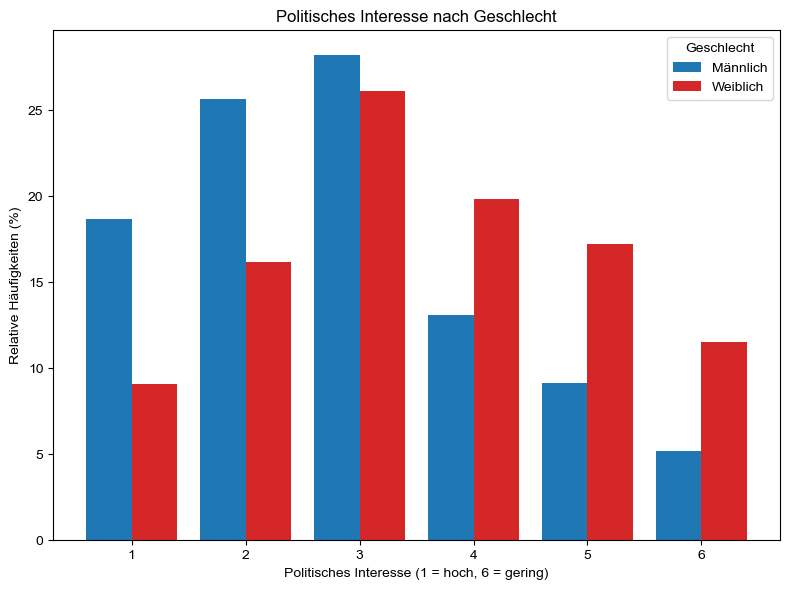

In [ ]:
# B4 als Zahl sicherstellen
df_cleaned["B4"] = pd.to_numeric(df_cleaned["B4"], errors="coerce")

# Nur "Männlich" und "Weiblich" filtern
df_filtered = df_cleaned[df_cleaned["S1"].isin(["Männlich", "Weiblich"])]

# Absolute Häufigkeiten berechnen
counts = df_filtered.groupby(['S1', 'B4']).size().unstack(fill_value=0)

# Sortierung der B4-Werte (Spalten)
counts = counts.reindex(columns=sorted(counts.columns))

# Relative Häufigkeiten je Geschlecht (Zeilennormierung)
rel_counts = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot-Vorbereitung
x = np.arange(len(rel_counts.columns))  # Positionen für B4-Werte (x-Achse)
bar_width = 0.4

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, rel_counts.loc["Männlich"], width=bar_width, label="Männlich", color="#1f77b4")  # Blau
plt.bar(x + bar_width/2, rel_counts.loc["Weiblich"], width=bar_width, label="Weiblich", color="#d62728")  # Rot

# Achsenbeschriftung
plt.xticks(x, [str(int(i)) for i in rel_counts.columns])
plt.xlabel("Politisches Interesse (1 = hoch, 6 = gering)")
plt.ylabel("Relative Häufigkeiten (%)")
plt.title("Politisches Interesse nach Geschlecht")
plt.legend(title="Geschlecht")
plt.tight_layout()
plt.show()


# BLOCK B: EINFLÜSSE AUF VERTRAUEN IN POLITISCHE INHALTE

## Hypothese 2
Personen, die politischen Organisationen auf sozialen Medien folgen, vertrauen politischen Informationen dort eher.

In [ ]:
# T-Test: Vertrauen (B7_3) nach Folgen von Politikern (C18)

# Nur vollständige Fälle (ohne NaN) verwenden
H2_ttest = df_cleaned[["C18", "B7_3"]].dropna()

# Gruppen definieren: 1 = Ja (folgt Politikern), 2 = Nein (folgt nicht)
gruppe_ja = H2_ttest[H2_ttest["C18"] == 1]["B7_3"]
gruppe_nein = H2_ttest[H2_ttest["C18"] == 2]["B7_3"]

# Mittelwerte berechnen
mean_ja = gruppe_ja.mean()
mean_nein = gruppe_nein.mean()

# T-Test für unabhängige Stichproben (Welch-Test)
t_stat, p_val = ttest_ind(gruppe_ja, gruppe_nein, equal_var=False, nan_policy='omit')

print(f"Mittelwert B7_3 (C18=1, folgt Politikern): {mean_ja:.2f}")
print(f"Mittelwert B7_3 (C18=2, folgt nicht): {mean_nein:.2f}")
print(f"T-Test: t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.001:
    print("Signifikanter Unterschied zwischen den Gruppen (p < 0.001).")
else:
    print("Kein signifikanter Unterschied zwischen den Gruppen (p ≥ 0.001).")

Mittelwert B7_3 (C18=1, folgt Politikern): 2.36
Mittelwert B7_3 (C18=2, folgt nicht): 2.31
T-Test: t = 0.696, p = 0.4869
Kein signifikanter Unterschied zwischen den Gruppen (p ≥ 0.001).


Die Hypothese wird abgelehnt: Das Folgen einer politischen Organisation auf sozialen Medien hängt nicht signifikant mit dem Vertrauen in die dortigen Inhalte zusammen (*t* = 0.696, *p* = .49).

## Hypothese 3
Je häufiger Menschen auf sozialen Medien mit politischen Informationen in Kontakt kommen, desto geringer ist das Vertrauen in politische Inhalte in sozialen Medien und desto kritischer bewerten sie die Glaubwürdigkeit dieser Inhalte.

In [40]:
# H5a - Korrelation: Touchpoint Politik & Vertrauen

# Nur vollständige Fälle (ohne NaN) verwenden
H5a = df_cleaned[["B5_3", "B7_3"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H5a["B5_3"], H5a["B7_3"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant.")
else:
    print("Der Zusammenhang ist nicht signifikant.")

Korrelationskoeffizient (r): -0.128
Signifikanzniveau (p-Wert): 0.0001
Der Zusammenhang ist statistisch signifikant.


In [41]:
#H5b - Korrelation: Touchpoint Politik & Glaubwürdigkeit 

# Nur vollständige Fälle (ohne NaN) verwenden
H5b = df_cleaned[["B5_3", "A3_2"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H5b["B5_3"], H5b["A3_2"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant.")
else:
    print("Der Zusammenhang ist nicht signifikant.")

Korrelationskoeffizient (r): 0.116
Signifikanzniveau (p-Wert): 0.0003
Der Zusammenhang ist statistisch signifikant.


Die Hypothese wird bestätigt: Je häufiger Menschen mit politischen Informationen auf sozialen Medien in Kontakt kommen, desto geringer ist das Vertrauen (*r* = -0.128, *p* < .001) und desto geringer ist die wahrgenommene Glaubwürdigkeit (*r* = 0.116, *p* < .001). Beide Zusammenhänge sind jedoch nur schwach.

## Hypothese 4
Die wahrgenommene Einseitigkeit politischer Inhalte in sozialen Medien reduziert die wahrgenommene Glaubwürdigkeit dieser Inhalte.

In [42]:
# relevante Variablen: B7_4 (Einseitigkeit) und A3_2 (Glaubwürdigkeit)

# Nur vollständige Fälle (ohne NaN) verwenden
H3 = df_cleaned[["B7_4", "A3_2"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H3["B7_4"], H3["A3_2"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant.")
else:
    print("Der Zusammenhang ist nicht signifikant.")

Korrelationskoeffizient (r): -0.191
Signifikanzniveau (p-Wert): 0.0000
Der Zusammenhang ist statistisch signifikant.


Die Hypothese wird bestätigt: Eine hohe wahrgenommene Einseitigkeit politischer Inhalte in sozialen Medien geht mit einer niedrigeren Glaubwürdigkeit dieser Inhalte einher (*r* = -0.191, *p* < .001). Der Zusammenhang ist jedoch nur schwach.

## Hypothese 5
Jüngere Menschen halten politische Inhalte in sozialen Medien für glaubwürdiger als ältere Menschen.

In [ ]:
# Lineare Regression: Alter (S2) als Prädiktor für Glaubwürdigkeit (A3_2)

# Nur vollständige Fälle (ohne NaN) verwenden
reg_data = df_cleaned[["S2", "A3_2"]].dropna()

X = reg_data["S2"]
y = reg_data["A3_2"]

# Konstante für Intercept hinzufügen
X = sm.add_constant(X)

# Regression berechnen
model = sm.OLS(y, X).fit()

# Ergebnisse ausgeben
koeff = model.params["S2"]
p_wert = model.pvalues["S2"]
r_quadrat = model.rsquared

print(f"Regressionskoeffizient (S2): {koeff:.3f}")
print(f"p-Wert: {p_wert:.4f}")
print(f"Bestimmtheitsmaß (R²): {r_quadrat:.3f}")

Regressionskoeffizient (S2): -0.000
p-Wert: 0.8975
Bestimmtheitsmaß (R²): 0.000


Die Hypothese wird abgelehnt: Das Alter scheint keinen signifikanten Einfluss darauf zu haben, ob Menschen politische Inhalte in sozialen Medien als mehr oder weniger glaubwürdig empfinden (*b* = -0.000, *p* = .898).

# BLOCK C: EINFLÜSSE AUF DEMOKRATIEZUFRIEDENHEIT

## Hypothese 6
Wer sich häufiger aktiv politisch auf sozialen Medien beteiligt (liken, posten, kommentieren), ist zufriedener mit der Demokratie.


In [38]:
# relevante Variablen: polit_engagement_index (Engagement auf sozialen Medien) und E27 (Demokratiezufriedenheit)

# Nur vollständige Fälle (ohne NaN) verwenden
H7 = df_cleaned[["polit_engagement_index", "E27"]].dropna()

# Pearson-Korrelation + p-Wert berechnen
korrelation, p_wert = pearsonr(H7["polit_engagement_index"], H7["E27"])

print(f"Korrelationskoeffizient (r): {korrelation:.3f}")
print(f"Signifikanzniveau (p-Wert): {p_wert:.4f}")

if p_wert < 0.001:
    print("Der Zusammenhang ist statistisch signifikant.")
else:
    print("Der Zusammenhang ist nicht signifikant.")


Korrelationskoeffizient (r): -0.006
Signifikanzniveau (p-Wert): 0.8613
Der Zusammenhang ist nicht signifikant.


Die Hypothese wird abgelehnt: Das eigene Engagement auf sozialen Medien hängt nicht signifikant mit der Demokratiezufriedenheit zusammen (*r* = -0.006, *p* = .861).

## Hypothese 7
Ein höheres Einkommen ist mit einer höheren Zufriedenheit mit der Demokratie verbunden.

In [274]:
# S9 umcodieren, sodass wir Ausprägungen von 1 bis 9 haben
# Neue Einkommensvariable S9 in einkommen_neu umcodieren

def map_einkommen(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if "Keine Angabe" in s or "Weiß nicht" in s:
        return np.nan
    if "unter 450" in s:
        return 1
    if "450" in s and "750" in s:
        return 2
    if "750" in s and "1.500" in s:
        return 3
    if "1.500" in s and "2.000" in s:
        return 4
    if "2.000" in s and "2.500" in s:
        return 5
    if "2.500" in s and "3.000" in s:
        return 6
    if "3.000" in s and "4.000" in s:
        return 7
    if "4.000" in s and "5.000" in s:
        return 8
    if "5.000" in s:
        return 9
    return np.nan

df_cleaned["einkommen_neu"] = df_cleaned["S9"].apply(map_einkommen)

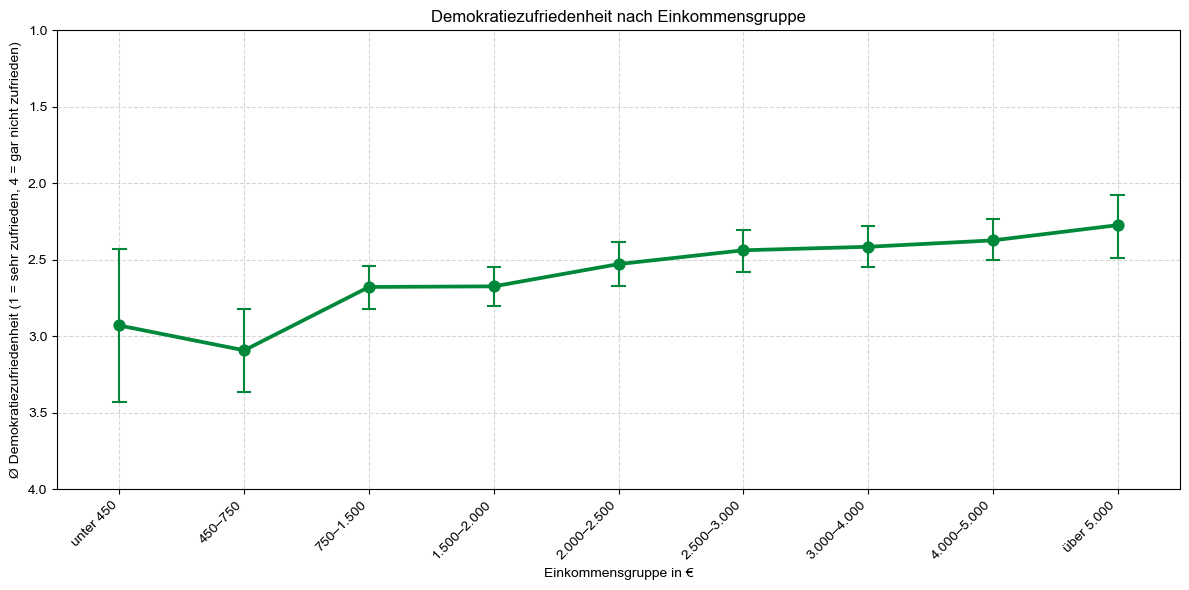

In [279]:
# E27 und einkommen_neu: Nur gültige Werte (ohne NaN)
df_viz = df_cleaned[["einkommen_neu", "E27"]].dropna()

# E27 als numerisch behandeln (z. B. 1–4 Skala)
df_viz["E27"] = pd.to_numeric(df_viz["E27"], errors="coerce")

# Einkommenslabels definieren (Index 0 = Gruppe 1 usw.)
einkommens_labels = [
    "unter 450", "450–750", "750–1.500", "1.500–2.000", "2.000–2.500",
    "2.500–3.000", "3.000–4.000", "4.000–5.000", "über 5.000"
]

# Plot
plt.figure(figsize=(12, 6))
sns.pointplot(
    x="einkommen_neu",
    y="E27",
    data=df_viz,
    estimator="mean",
    ci=95,
    capsize=0.1,
    color="#00883A",
    errwidth=1.5
)

# Achsenbeschriftungen
plt.xticks(ticks=range(9), labels=einkommens_labels, rotation=45, ha="right")
plt.xlabel("Einkommensgruppe in €")
plt.ylabel("Ø Demokratiezufriedenheit (1 = sehr zufrieden, 4 = gar nicht zufrieden)")
plt.title("Demokratiezufriedenheit nach Einkommensgruppe")
plt.ylim(1, 4)
plt.gca().invert_yaxis()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [8]:
# Datentyp der Variable einkommen_neu überprüfen
print(df_cleaned["einkommen_neu"].dtype)

float64


In [281]:
# H8a: Rechnen einer Rangkorrelation nach Spearman

# Nur vollständige Fälle (ohne NaN) verwenden
H8a = df_cleaned[["einkommen_neu", "E27"]].dropna()

# Spearman-Rangkorrelation berechnen
corr, pval = spearmanr(H8a["einkommen_neu"], H8a["E27"])

print(f"Spearman-Rangkorrelation: r = {corr:.3f}, p = {pval:.4f}")

if pval < 0.001:
    print("Statistisch signifikanter Zusammenhang.")
else:
    print("Kein signifikanter Zusammenhang.")


Spearman-Rangkorrelation: r = -0.204, p = 0.0000
Statistisch signifikanter Zusammenhang.


Die Hypothese wird bestätigt: Höheres Einkommen geht mit einer höheren Demokratiezufriedenheit einher (*r* = -0.204, *p* < .001). Der Zusammenhang ist jedoch nur schwach.

In [282]:
# H8b: Bildung & Demokratiezufriedenheit 
#neue Bildungsvariable bilden (Gruppen)

def map_bildung_groups(x):
    if pd.isna(x):
        return np.nan
    if x in [3, 4, 8]:
        return 1  # Hochschulreife/Fachhochschule/Student/in
    if x in [1, 2, 7]:
        return 2  # Hauptschule/Mittlere Reife/Sonstiges
    if x in [5, 6]:
        return np.nan  # Noch in Schulausbildung → ignorieren
    return np.nan

df_cleaned["Bildung_groups"] = df_cleaned["S4"].apply(map_bildung_groups)

# Relative Häufigkeiten berechnen und ausgeben
rel_freq = df_cleaned["Bildung_groups"].value_counts(normalize=True, dropna=False).sort_index()
print("Relative Häufigkeiten von Bildung_groups:")
print(rel_freq.round(3))

Relative Häufigkeiten von Bildung_groups:
Bildung_groups
1.0    0.421
2.0    0.521
NaN    0.059
Name: proportion, dtype: float64


In [283]:
# H8b: Bildung & Demokratiezufriedenheit (t-Test)

# Nur vollständige Fälle (ohne NaN) verwenden
H8b = df_cleaned[["Bildung_groups", "E27"]].dropna()

# Gruppen definieren
gruppe1 = H8b[H8b["Bildung_groups"] == 1]["E27"]
gruppe2 = H8b[H8b["Bildung_groups"] == 2]["E27"]

# t-Test für unabhängige Stichproben
t_stat, p_val = ttest_ind(gruppe1, gruppe2, equal_var=False, nan_policy='omit')

print(f"T-Test: t = {t_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.001:
    print("Signifikanter Unterschied zwischen den Gruppen (p < 0.001).")
else:
    print("Kein signifikanter Unterschied zwischen den Gruppen (p ≥ 0.001).")


T-Test: t = -7.230, p = 0.0000
Signifikanter Unterschied zwischen den Gruppen (p < 0.001).


In [284]:
# Mittelwerte der Demokratiezufriedenheit (E27) für beide Bildungsgruppen ausgeben

mean_gruppe1 = gruppe1.mean()
mean_gruppe2 = gruppe2.mean()

print(f"Mittelwert E27 für Bildung_groups = 1: {mean_gruppe1:.2f}")
print(f"Mittelwert E27 für Bildung_groups = 2: {mean_gruppe2:.2f}")

Mittelwert E27 für Bildung_groups = 1: 2.35
Mittelwert E27 für Bildung_groups = 2: 2.71


Die Hypothese wird bestätigt: Menschen mit höherem Bildungsgrad sind zufriedener mit der Demokratie als Menschen mit niedrigerem Bildungsgrad (*t* = -7.230, *p* < .001, hoher Bildungsabschluss: *M* = 2.35, niedriger Bildungdabschluss: *M* = 2.71).

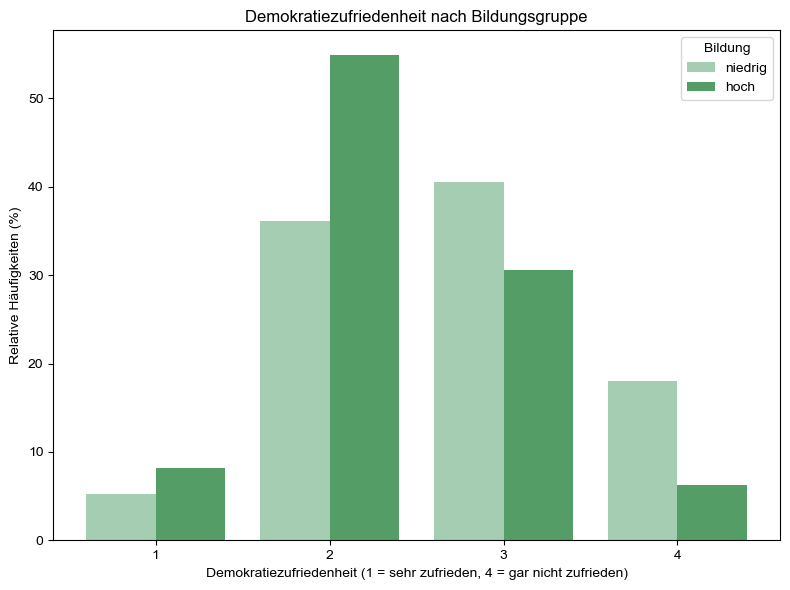

In [287]:
# Visualisierung: Bildung & Demokratiezufriedenheit

# E27 als Zahl sicherstellen
df_cleaned["E27"] = pd.to_numeric(df_cleaned["E27"], errors="coerce")

# Nur gültige Bildungsgruppen (1=hoch, 2=niedrig)
df_bild = df_cleaned[df_cleaned["Bildung_groups"].isin([1, 2])]

# Absolute Häufigkeiten von E27 pro Bildungsgruppe
counts = df_bild.groupby(['Bildung_groups', 'E27']).size().unstack(fill_value=0)

# Sortierung der E27-Werte (1–4)
counts = counts.reindex(columns=sorted(counts.columns))

# Relative Häufigkeiten je Bildungsgruppe (Zeilennormierung)
rel_counts = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot-Vorbereitung
x = np.arange(len(rel_counts.columns))  # Positionen für E27-Werte (x-Achse)
bar_width = 0.4

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, rel_counts.loc[2], width=bar_width, label="niedrig", color="#A4CDB2")
plt.bar(x + bar_width/2, rel_counts.loc[1], width=bar_width, label="hoch", color="#549D67")

# Achsenbeschriftung
plt.xticks(x, [str(int(i)) for i in rel_counts.columns])
plt.xlabel("Demokratiezufriedenheit (1 = sehr zufrieden, 4 = gar nicht zufrieden)")
plt.ylabel("Relative Häufigkeiten (%)")
plt.title("Demokratiezufriedenheit nach Bildungsgruppe")
plt.legend(title="Bildung")
plt.tight_layout()
plt.show()



## Hypothese 8
Die wahrgenommene Einseitigkeit politischer Informationen in sozialen Medien wirkt sich negativ auf die Demokratiezufriedenheit aus – dieser Zusammenhang wird vollständig durch das Vertrauen in politische Inhalte vermittelt.

In [113]:
# relevante Variablen: UV = B7_4 (Einseitigkeit), AV = E27 (Demokratiezufriedenheit), Mediator = B7_3 (Vertrauen). Mediation-Analyse durchführen.

from statsmodels.formula.api import ols

# Nur vollständige Fälle für die drei Variablen
med_data = df_cleaned[["B7_4", "B7_3", "E27"]].dropna()

# Schritt 1: Mediator (B7_3) auf UV (B7_4) regressieren
model_mediator = ols("B7_3 ~ B7_4", data=med_data).fit()

# Schritt 2: AV (E27) auf UV (B7_4) und Mediator (B7_3) regressieren
model_outcome = ols("E27 ~ B7_4 + B7_3", data=med_data).fit()

# Schritt 3: AV (E27) nur auf UV (B7_4) regressieren (total effect)
model_total = ols("E27 ~ B7_4", data=med_data).fit()

print("Mediator-Modell (B7_3 ~ B7_4):")
print(model_mediator.summary())
print("\nOutcome-Modell (E27 ~ B7_4 + B7_3):")
print(model_outcome.summary())
print("\nTotal Effect Modell (E27 ~ B7_4):")
print(model_total.summary())

# Indirekter Effekt (a*b)
a = model_mediator.params["B7_4"]
b = model_outcome.params["B7_3"]
indirect_effect = a * b
direct_effect = model_outcome.params["B7_4"]
total_effect = model_total.params["B7_4"]

print(f"\nIndirekter Effekt (a*b): {indirect_effect:.3f}")
print(f"Direkter Effekt (c'): {direct_effect:.3f}")
print(f"Totaler Effekt (c): {total_effect:.3f}")

Mediator-Modell (B7_3 ~ B7_4):
                            OLS Regression Results                            
Dep. Variable:                   B7_3   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     220.4
Date:                Sat, 12 Jul 2025   Prob (F-statistic):           1.41e-44
Time:                        15:49:06   Log-Likelihood:                -829.92
No. Observations:                 865   AIC:                             1664.
Df Residuals:                     863   BIC:                             1673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3587

Die Hypothese wird abgelehnt: Die Regression des Mediators (Vertrauen) auf die UV (wahrgenommene Einseitigkeit) ergab einen signifikanten positiven Effekt. Das bedeutet: Je einseitiger politische Informationen wahrgenommen werden, desto geringer ist das Vertrauen (*B* = 0.43, *t*  = 14.85, *SE* = 0.03 *p* < .001). Die Regression der AV auf UV und Mediator ergab keinen signifikanten Effekt des Mediators auf die AV (*B* = –0.06, *t* = -1.37, *SE* = 0.04, *p* = .17). Auch der direkte Effekt der UV auf die AV war statistisch nicht signifikant (*B* = 0.06, *t* = 1.57, *SE* = 0.04, *p* = .12). Die Regression der AV allein auf die UV zeigte ebenfalls keinen signifikanten Zusammenhang (*B* = 0.04, *t* = 1.06, *SE* = 0.04, *p* = .29).

Die Ergebnisse liefern Hinweise auf einen Zusammenhang zwischen wahrgenommener Einseitigkeit und Vertrauen in politische Inhalte, jedoch keine belastbaren Belege für eine Auswirkung auf die Demokratiezufriedenheit – weder direkt noch indirekt über Vertrauen. Somit kann die aufgestellte Hypothese nicht bestätigt werden. Insbesondere fehlt der Nachweis, dass Vertrauen als Mediator signifikant zur Erklärung der Demokratiezufriedenheit beiträgt. Die Annahmen für eine vollständige oder partielle Mediation wurden damit nicht erfüllt.